In [4]:
import pandas as pd
import numpy as np 

# Importation des bases de données 

nig = pd.read_csv("NigeriaTRAIN.csv", sep = ";")

In [5]:
nig.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0


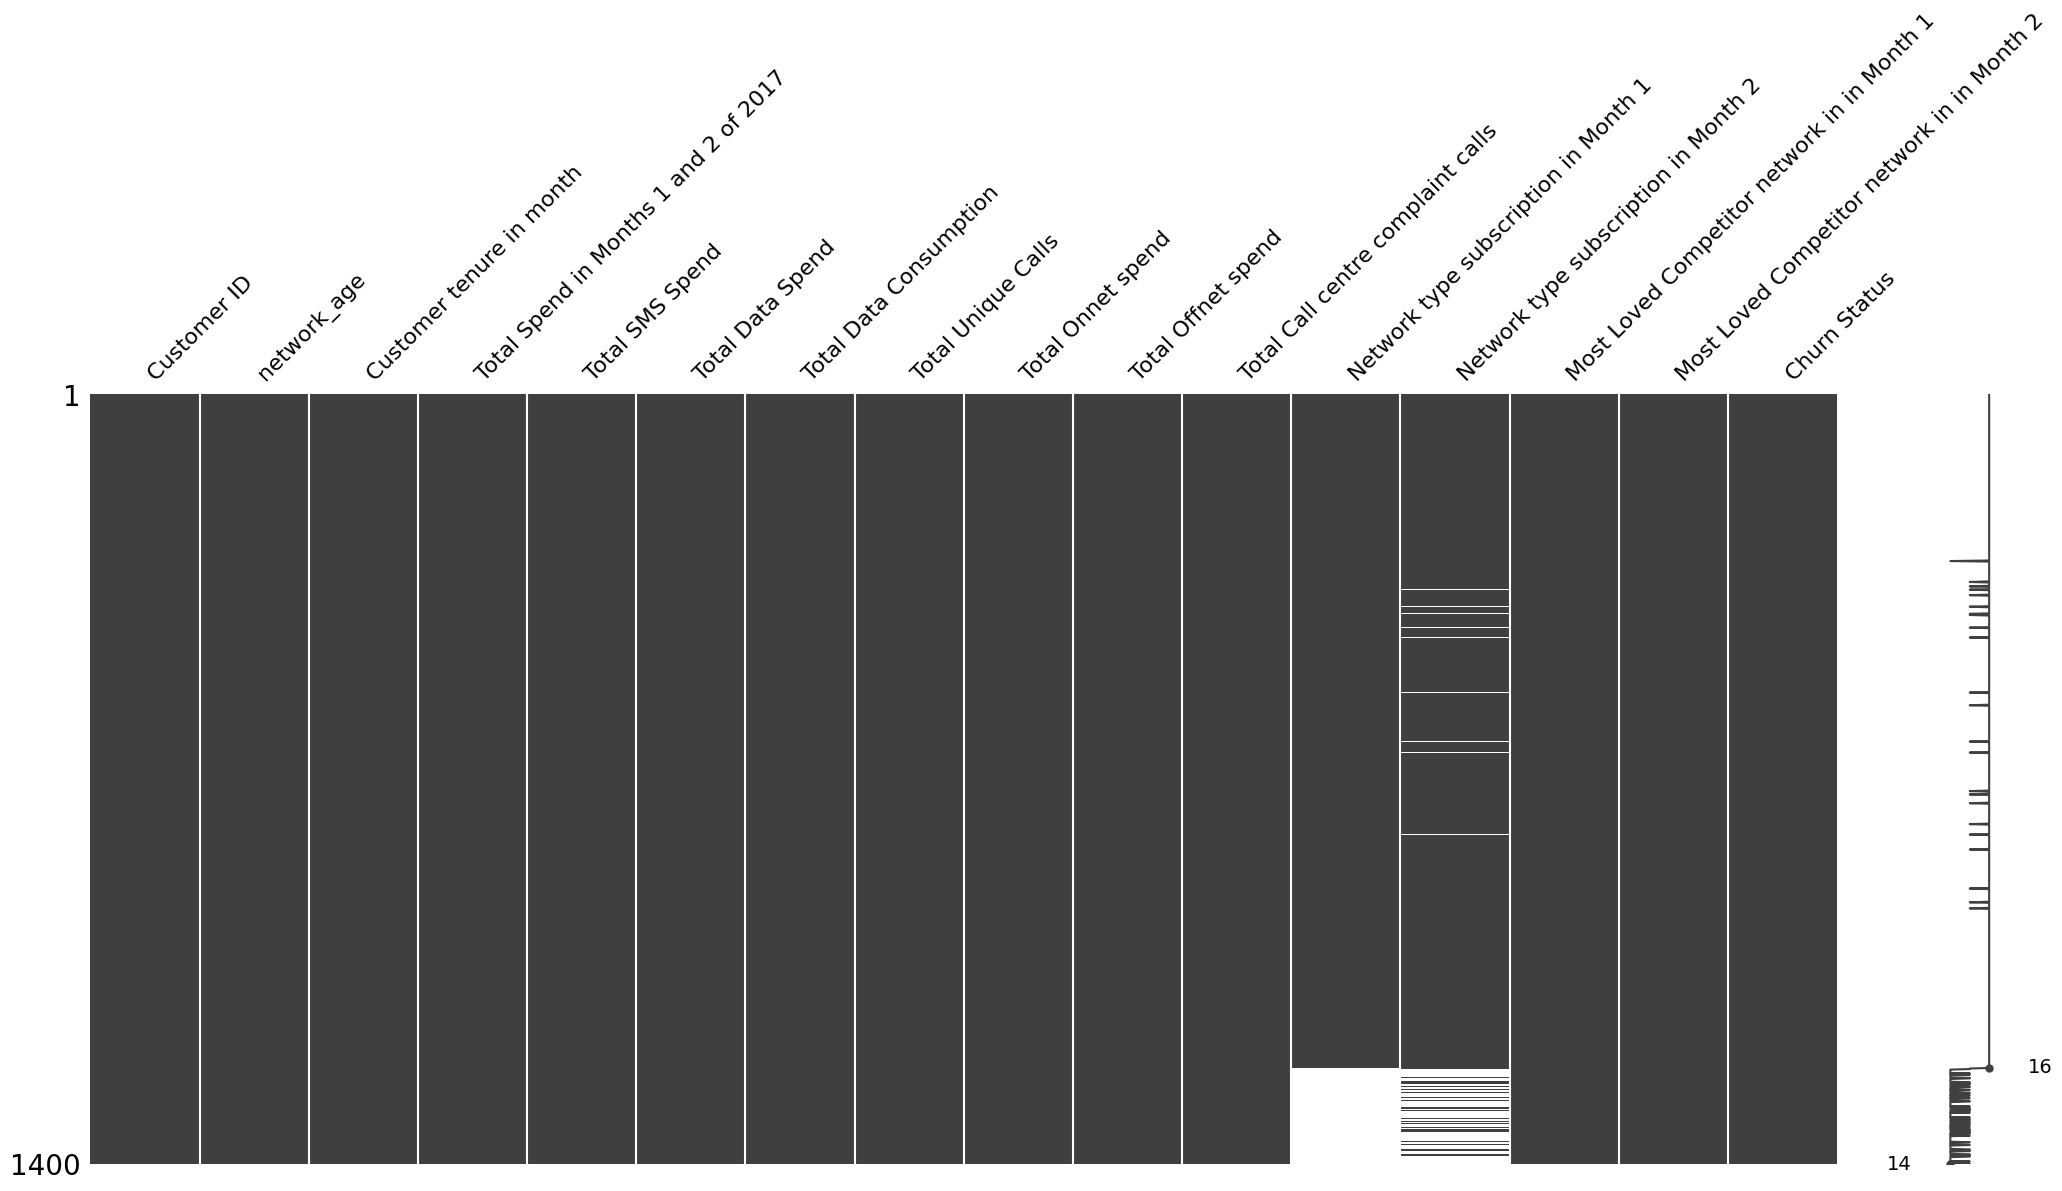

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Affichage du graphique des valeurs manquantes
%matplotlib inline
msno.matrix(nig)
plt.show()



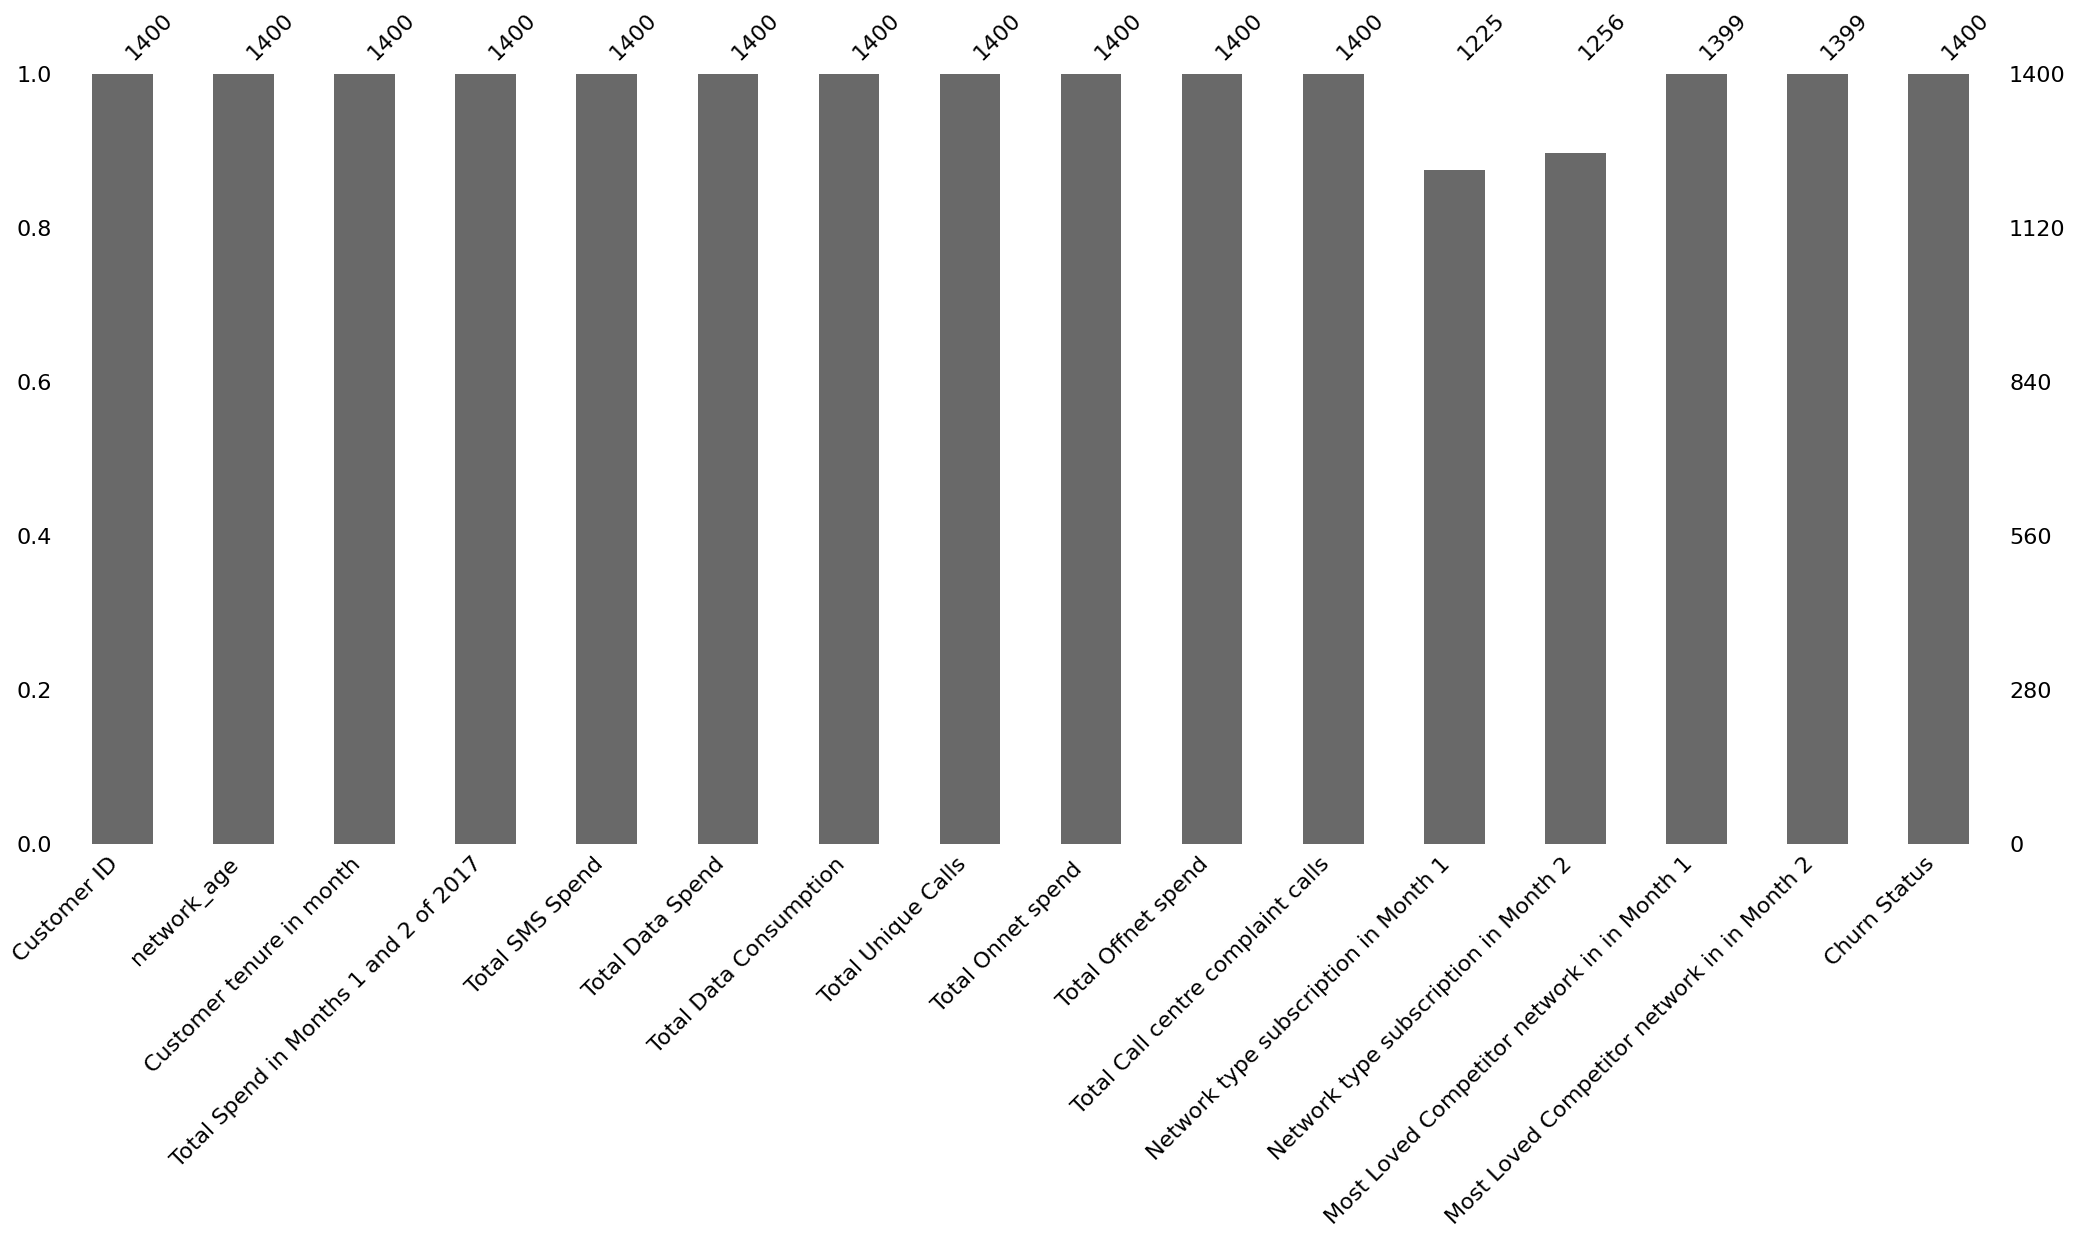

In [7]:
# Affichage du barplot des valeurs manquantes par variable
%matplotlib inline
msno.bar(nig)
plt.show()

In [8]:
lignes_na = nig[nig.isna().any(axis=1)]
display(lignes_na)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
303,ADF2000,2308,76.93,481.9000,0.00,125.00,6.205152e+05,3,0,609,1,2G,2G,NaN,NaN,0
341,ADF0125,473,15.77,1229.6324,37.08,75.00,5.429410e+06,537,16344,51046,1,3G,NaN,Weematel,Mango,1
349,ADF0138,214,7.13,4673.5620,181.14,1043.75,3.111038e+06,144,51846,151965,4,3G,NaN,ToCall,Mango,1
355,ADF0268,1407,46.90,154.7092,0.00,17.50,3.651085e+07,10,275,1601,1,3G,NaN,Zintel,PQza,0
365,ADF0288,1448,48.27,309.8880,0.00,91.25,6.646839e+06,11,0,2430,1,3G,NaN,Mango,PQza,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,ADF1956,136,4.53,270.3344,6.58,2.50,7.410753e+03,62,9504,10820,1,NaN,NaN,PQza,Zintel,0
1396,ADF1965,1795,59.83,1024.8460,111.99,10.00,4.936720e+05,149,18202,40730,2,NaN,NaN,Mango,Zintel,0
1397,ADF1967,203,6.77,1143.4972,19.84,13.75,2.619307e+02,284,360,81341,3,NaN,NaN,Zintel,Zintel,0
1398,ADF1971,109,3.63,45.0900,0.00,0.00,6.581623e+05,20,240,3611,1,NaN,3G,Uxaa,Zintel,1


In [9]:
# Imputer les valeurs manquantes avec la modalité la plus fréquente (mode)
for col in ["Most Loved Competitor network in in Month 1", "Most Loved Competitor network in in Month 2"]:
    mode_value = nig[col].mode()[0]  # Récupère la valeur la plus fréquente
    nig[col].fillna(mode_value, inplace=True)

# Vérifier s'il reste des valeurs manquantes
print(nig[["Most Loved Competitor network in in Month 1", "Most Loved Competitor network in in Month 2"]].isnull().sum())


Most Loved Competitor network in in Month 1    0
Most Loved Competitor network in in Month 2    0
dtype: int64


In [10]:
pd.DataFrame(nig.iloc[303]).T

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
303,ADF2000,2308,76.93,481.9,0.0,125.0,620515.1875,3,0,609,1,2G,2G,PQza,Uxaa,0


In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encoder les catégories (2G, 3G, 4G) en nombres
encoder = LabelEncoder()
for col in ["Network type subscription in Month 1", "Network type subscription in Month 2"]:
    nig[col] = nig[col].astype(str)  # Convertir en string
    nig[col] = np.where(nig[col] == "nan", np.nan, encoder.fit_transform(nig[col]))  # Gérer les NaN

# Sélection des colonnes pour l'imputation
cols_to_impute = ["Network type subscription in Month 1", "Network type subscription in Month 2", "Total Data Consumption"]

# Séparer les données en deux groupes :
# 1. Les lignes complètes (utilisées comme voisins)
# 2. Les lignes incomplètes (à imputer)
complete_cases = nig.dropna(subset=cols_to_impute)  # Lignes sans NaN (voisins fiables)
incomplete_cases = nig[nig[cols_to_impute].isnull().any(axis=1)]  # Lignes avec au moins un NaN

# Vérifier si on a assez de voisins (sinon, réduire `n_neighbors`)
k = min(5, len(complete_cases))  # K ne doit pas être plus grand que le nombre de lignes valides

# Appliquer KNN uniquement sur les lignes valides
imputer = KNNImputer(n_neighbors=k)
imputer.fit(complete_cases[cols_to_impute])  # Entraînement uniquement sur les lignes complètes

# Imputation des valeurs manquantes
nig.loc[incomplete_cases.index, cols_to_impute] = imputer.transform(incomplete_cases[cols_to_impute])

# Décoder les valeurs numériques en catégories d'origine
for col in ["Network type subscription in Month 1", "Network type subscription in Month 2"]:
    nig[col] = encoder.inverse_transform(nig[col].round().astype(int))  # Reconvertir en 2G, 3G, 4G

# Vérifier s'il reste des valeurs manquantes
print(nig[cols_to_impute].isnull().sum())


Network type subscription in Month 1    0
Network type subscription in Month 2    0
Total Data Consumption                  0
dtype: int64


In [12]:
pd.DataFrame(nig.iloc[1395]).T

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
1395,ADF1956,136,4.53,270.3344,6.58,2.5,7410.7529,62,9504,10820,1,3G,3G,PQza,Zintel,0


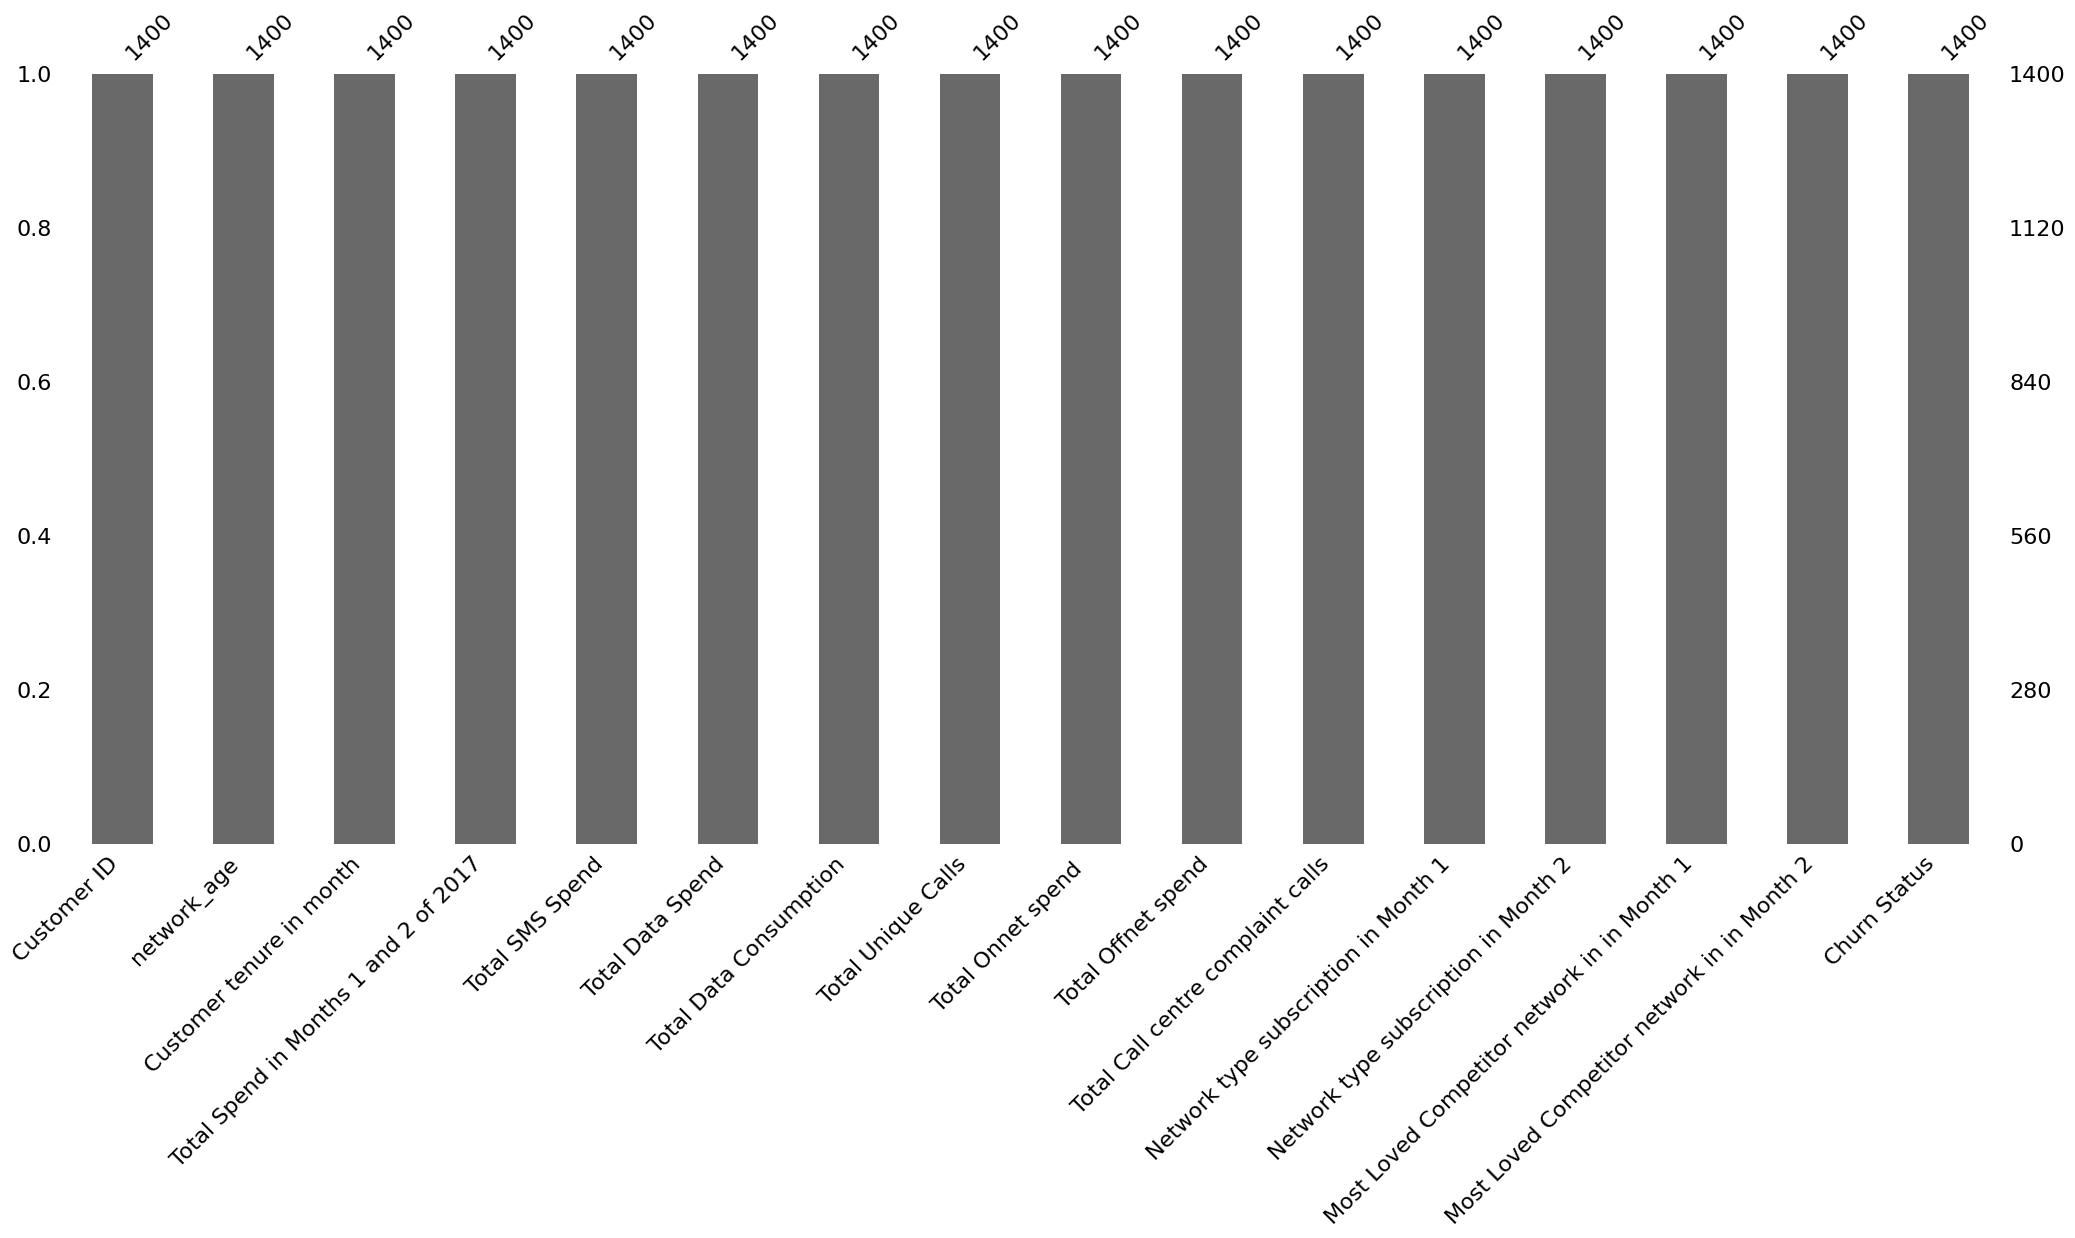

In [13]:
msno.bar(nig)
plt.show()

In [14]:
# Nettoyer les noms de colonnes pour éviter les erreurs
nig.columns = nig.columns.str.strip()  # Supprime les espaces invisibles

In [15]:

# Filtrer les lignes où les deux colonnes sont >= 0
filtered_rows = nig[(nig["network_age"] <= 0) | (nig["Customer tenure in month"] <= 0) | (nig['Total Spend in Months 1 and 2 of 2017'] <= 0) | (nig['Total SMS Spend'] < 0) | (nig['Total Data Spend'] < 0)
                    | (nig['Total Data Consumption'] <= 0) | (nig['Total Unique Calls'] < 0) | (nig['Total Onnet spend'] < 0) | (nig['Total Offnet spend'] < 0) | (nig['Total Call centre complaint calls'] < 0)]

# Afficher le tableau des lignes correspondantes
display(filtered_rows)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
490,ADF0631,-5,-0.17,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,3G,3G,ToCall,ToCall,1
916,ADF1925,-4,-0.13,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,3G,3G,Mango,Weematel,1
1163,ADF1623,-2,-0.07,130.5780,94.85,1.25,2.195300e+00,7,150,1121,1,Other,Other,Uxaa,Uxaa,1


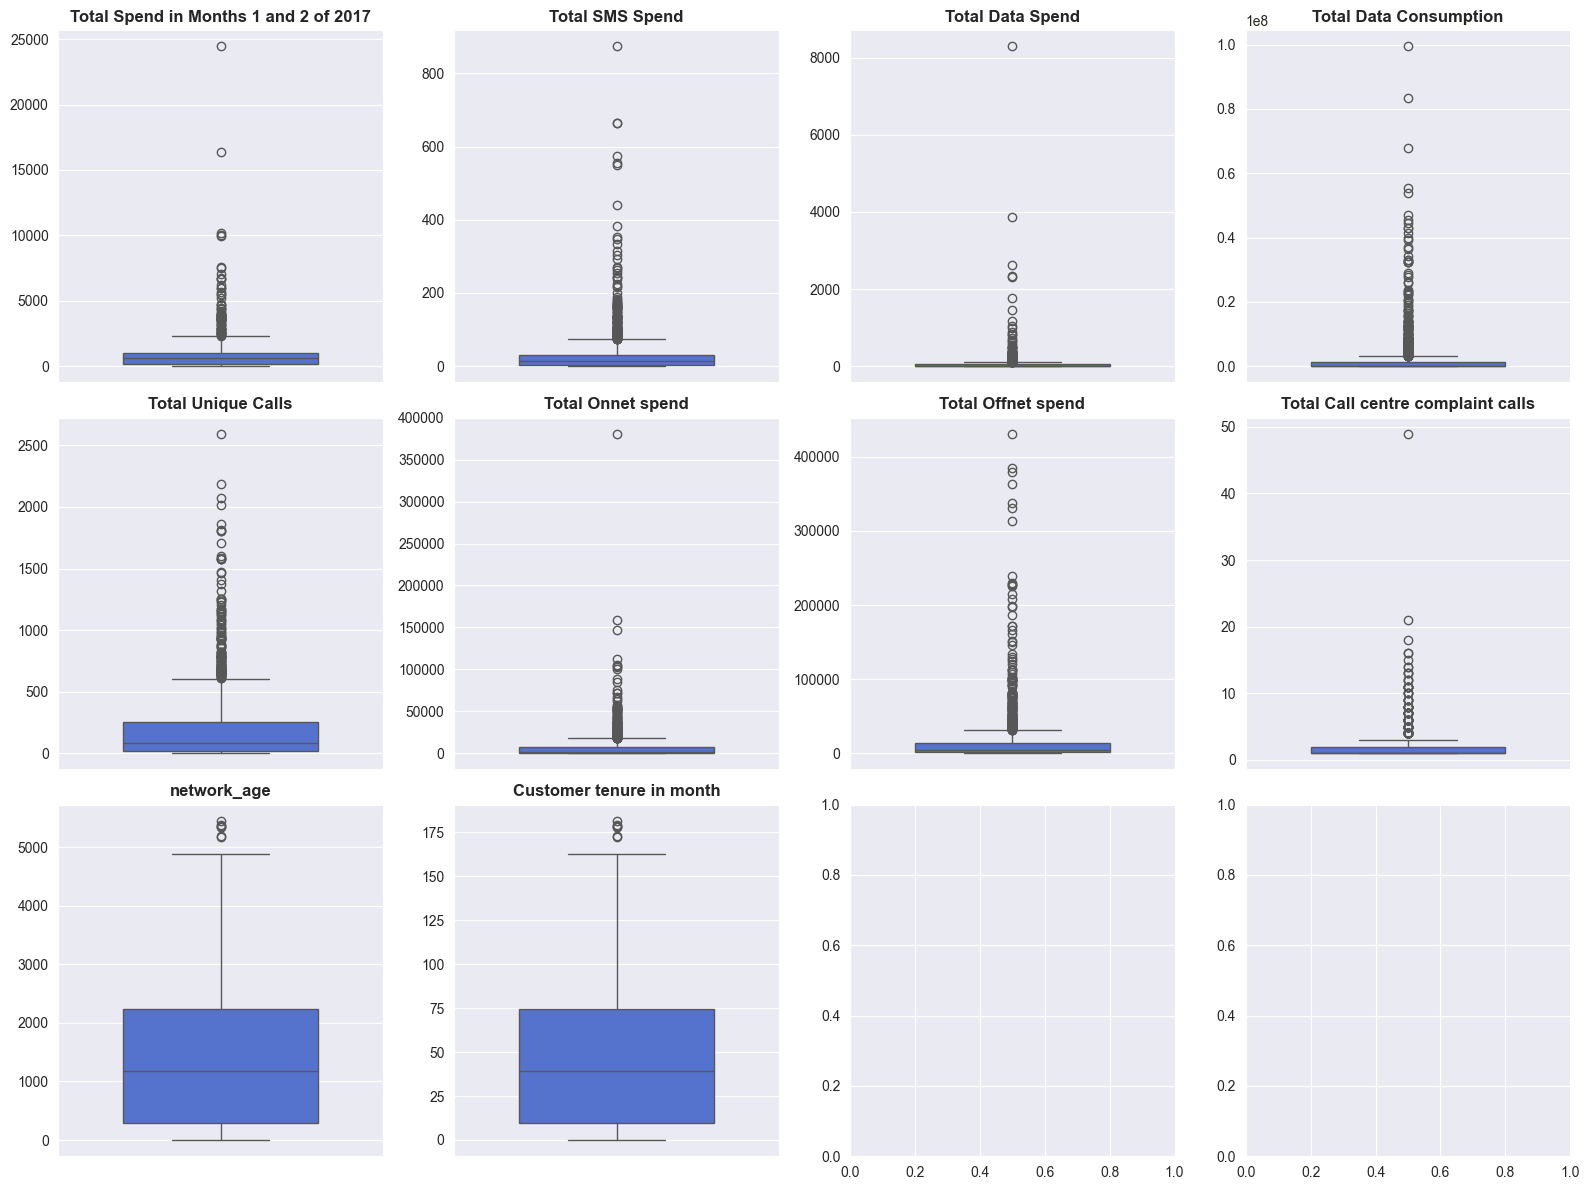

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Liste des variables quantitatives d'intérêt
quant_vars = [
    "Total Spend in Months 1 and 2 of 2017", "Total SMS Spend", 
    "Total Data Spend", "Total Data Consumption", "Total Unique Calls", 
    "Total Onnet spend", "Total Offnet spend", "Total Call centre complaint calls",
    "network_age", "Customer tenure in month"
]

# Vérifier la présence des variables
missing_vars = [var for var in quant_vars if var not in nig.columns]
if missing_vars:
    print(f"⚠️ Variables manquantes : {missing_vars}")
    quant_vars = [var for var in quant_vars if var in nig.columns]  # Retirer celles manquantes

# Définir un style plus esthétique
sns.set_style("darkgrid")  
sns.set_palette("viridis")  # Palette de couleurs dynamique

# Créer les boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))  # Grille 3x4
axes = axes.flatten()  # Aplatir pour un accès plus simple

for i, var in enumerate(quant_vars):
    sns.boxplot(y=nig[var], ax=axes[i], color="royalblue", width=0.6)
    #sns.swarmplot(y=nig[var], ax=axes[i], color="orange", alpha=0.5, size=3)  # Ajout des points
    axes[i].set_title(var, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")  # Pas d'étiquette X
    axes[i].set_ylabel("")  # Pas d'étiquette Y

# Ajustements finaux
plt.tight_layout()
plt.show()


Nombre d'observations détectées comme anomalies : 14


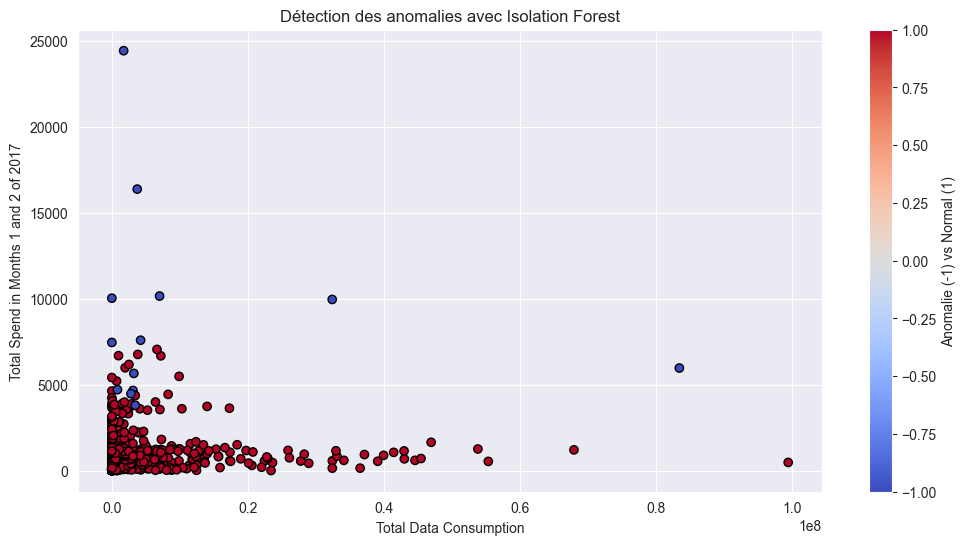

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Sélectionner les variables quantitatives d'intérêt
quantitative_vars = [
    "network_age", "Customer tenure in month", "Total Spend in Months 1 and 2 of 2017",
    "Total SMS Spend", "Total Data Spend", "Total Data Consumption",
    "Total Unique Calls", "Total Onnet spend", "Total Offnet spend",
    "Total Call centre complaint calls"
]

# Supprimer les lignes contenant des valeurs manquantes dans ces variables
nig_cleaned = nig.dropna(subset=quantitative_vars)

# Initialiser et entraîner Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
nig_cleaned["anomaly_score"] = iso_forest.fit_predict(nig_cleaned[quantitative_vars])

# Identifier les valeurs aberrantes (-1 = anomalie, 1 = normal)
outliers = nig_cleaned[nig_cleaned["anomaly_score"] == -1]

# Afficher le nombre d'anomalies détectées
print(f"Nombre d'observations détectées comme anomalies : {len(outliers)}")

# Visualiser les anomalies détectées sur quelques variables
plt.figure(figsize=(12, 6))
plt.scatter(nig_cleaned["Total Data Consumption"], nig_cleaned["Total Spend in Months 1 and 2 of 2017"],
            c=nig_cleaned["anomaly_score"], cmap="coolwarm", edgecolors="k")
plt.xlabel("Total Data Consumption")
plt.ylabel("Total Spend in Months 1 and 2 of 2017")
plt.title("Détection des anomalies avec Isolation Forest")
plt.colorbar(label="Anomalie (-1) vs Normal (1)")
plt.show()


In [18]:
nig_cleaned[nig_cleaned["network_age"] < 0]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,anomaly_score
490,ADF0631,-5,-0.17,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,3G,3G,ToCall,ToCall,1,1
916,ADF1925,-4,-0.13,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,3G,3G,Mango,Weematel,1,1
1163,ADF1623,-2,-0.07,130.5780,94.85,1.25,2.195300e+00,7,150,1121,1,Other,Other,Uxaa,Uxaa,1,1


In [19]:
nig_cleaned = nig_cleaned[nig_cleaned["network_age"] >= 0]

In [20]:
nig_cleaned[nig_cleaned["network_age"] < 0]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,anomaly_score


In [21]:
# Remplacement des valeurs 0 par "Aucun"
nig_cleaned["Most Loved Competitor network in in Month 1"] = nig_cleaned["Most Loved Competitor network in in Month 1"].replace(0, "Aucun")
nig_cleaned["Most Loved Competitor network in in Month 2"] = nig_cleaned["Most Loved Competitor network in in Month 2"].replace(0, "Aucun")

# Vérification
nig_cleaned[nig_cleaned["Most Loved Competitor network in in Month 1"] == 0]
nig_cleaned[nig_cleaned["Most Loved Competitor network in in Month 2"] == 0]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,anomaly_score


In [22]:
nig_cleaned['Churn Status'].describe()

count    1397.000000
mean        0.498926
std         0.500178
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Status, dtype: float64

## Separation des donnees train et test

In [23]:
nig_cleaned = nig_cleaned.drop(columns=['anomaly_score']) #,,'network_age'

In [24]:
nig_cleaned.to_csv('nig_clean.csv')

In [25]:
#nig_cleaned['Churn Status'] = nig_cleaned['Churn Status'].replace(0, -1)

In [26]:
df = nig_cleaned

In [72]:
from sklearn.model_selection import train_test_split

def stratified_split(data, target_column, test_size=0.2, random_state=None):
    """
    Sépare les données en sets de train et de test en maintenant l'équilibre de classes dans la variable cible.
    
    Parameters:
    - data : DataFrame, l'ensemble de données complet
    - target_column : str, le nom de la colonne cible à stratifier (par exemple 'Churn Status')
    - test_size : float, la proportion de données à inclure dans le test (par défaut 0.2)
    - random_state : int ou None, pour reproduire la séparation
    
    Returns:
    - X_train, X_test, y_train, y_test : ensembles de données séparés en fonction de la variable cible
    """
    # Séparation des caractéristiques (X) et de la variable cible (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Utilisation de la stratification pour assurer un équilibre de 1 et 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [73]:
X_train, X_test, y_train, y_test = stratified_split(df, target_column='Churn Status', test_size=0.2, random_state=42)

In [38]:
X_train.to_csv("X_train.csv")

In [39]:
X_test.to_csv("X_test.csv")

In [259]:
len(y_train[y_train == 0])

560

In [260]:
len(y_train[y_train == 1])

557

In [261]:
len(y_test[y_test == 0])

140

In [262]:
len(y_test[y_test == 1])

140

## Encodage des variables categorielles (pipeline)

In [263]:
def frequency_encoding(df, columns):
    """
    Effectue un frequency encoding sur les colonnes spécifiées du DataFrame.
    
    Parameters:
    - df : DataFrame, le DataFrame contenant les colonnes à encoder
    - columns : list, la liste des noms des colonnes à encoder
    
    Returns:
    - df : DataFrame, avec les colonnes encodées
    """
    for column in columns:
        # Calcul des fréquences
        frequency = df[column].value_counts() / len(df)
        
        # Remplacer les valeurs par leurs fréquences
        df[column] = df[column].map(frequency)
    
    return df

# Exemple d'utilisation :
columns_to_encode = [
    'Network type subscription in Month 1', 
    'Network type subscription in Month 2',
    'Most Loved Competitor network in in Month 1',
    'Most Loved Competitor network in in Month 2'
]

# Appliquer le frequency encoding
X_train_normalized = frequency_encoding(X_train, columns_to_encode)
X_test_normalized = frequency_encoding(X_test, columns_to_encode)

In [264]:
X_train.head()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
220,78.27,52.6720,4.10,13.75,104.8828,56,660,0,1,0.208594,0.198747,0.228290,0.601611
1046,87.40,15.4620,0.00,3.75,28.6494,12,753,179,4,0.207699,0.205013,0.228290,0.601611
249,7.57,219.9040,33.75,3.75,35845.0654,55,858,7990,1,0.208594,0.198747,0.228290,0.601611
452,15.70,212.6680,13.70,25.00,435252.5381,2,0,358,1,0.583706,0.596240,0.250671,0.217547
1256,23.93,60.4104,21.10,0.00,34.6455,14,3106,179,1,0.583706,0.596240,0.250671,0.217547


### Distribution des variables (pour standardiser/normaliser)

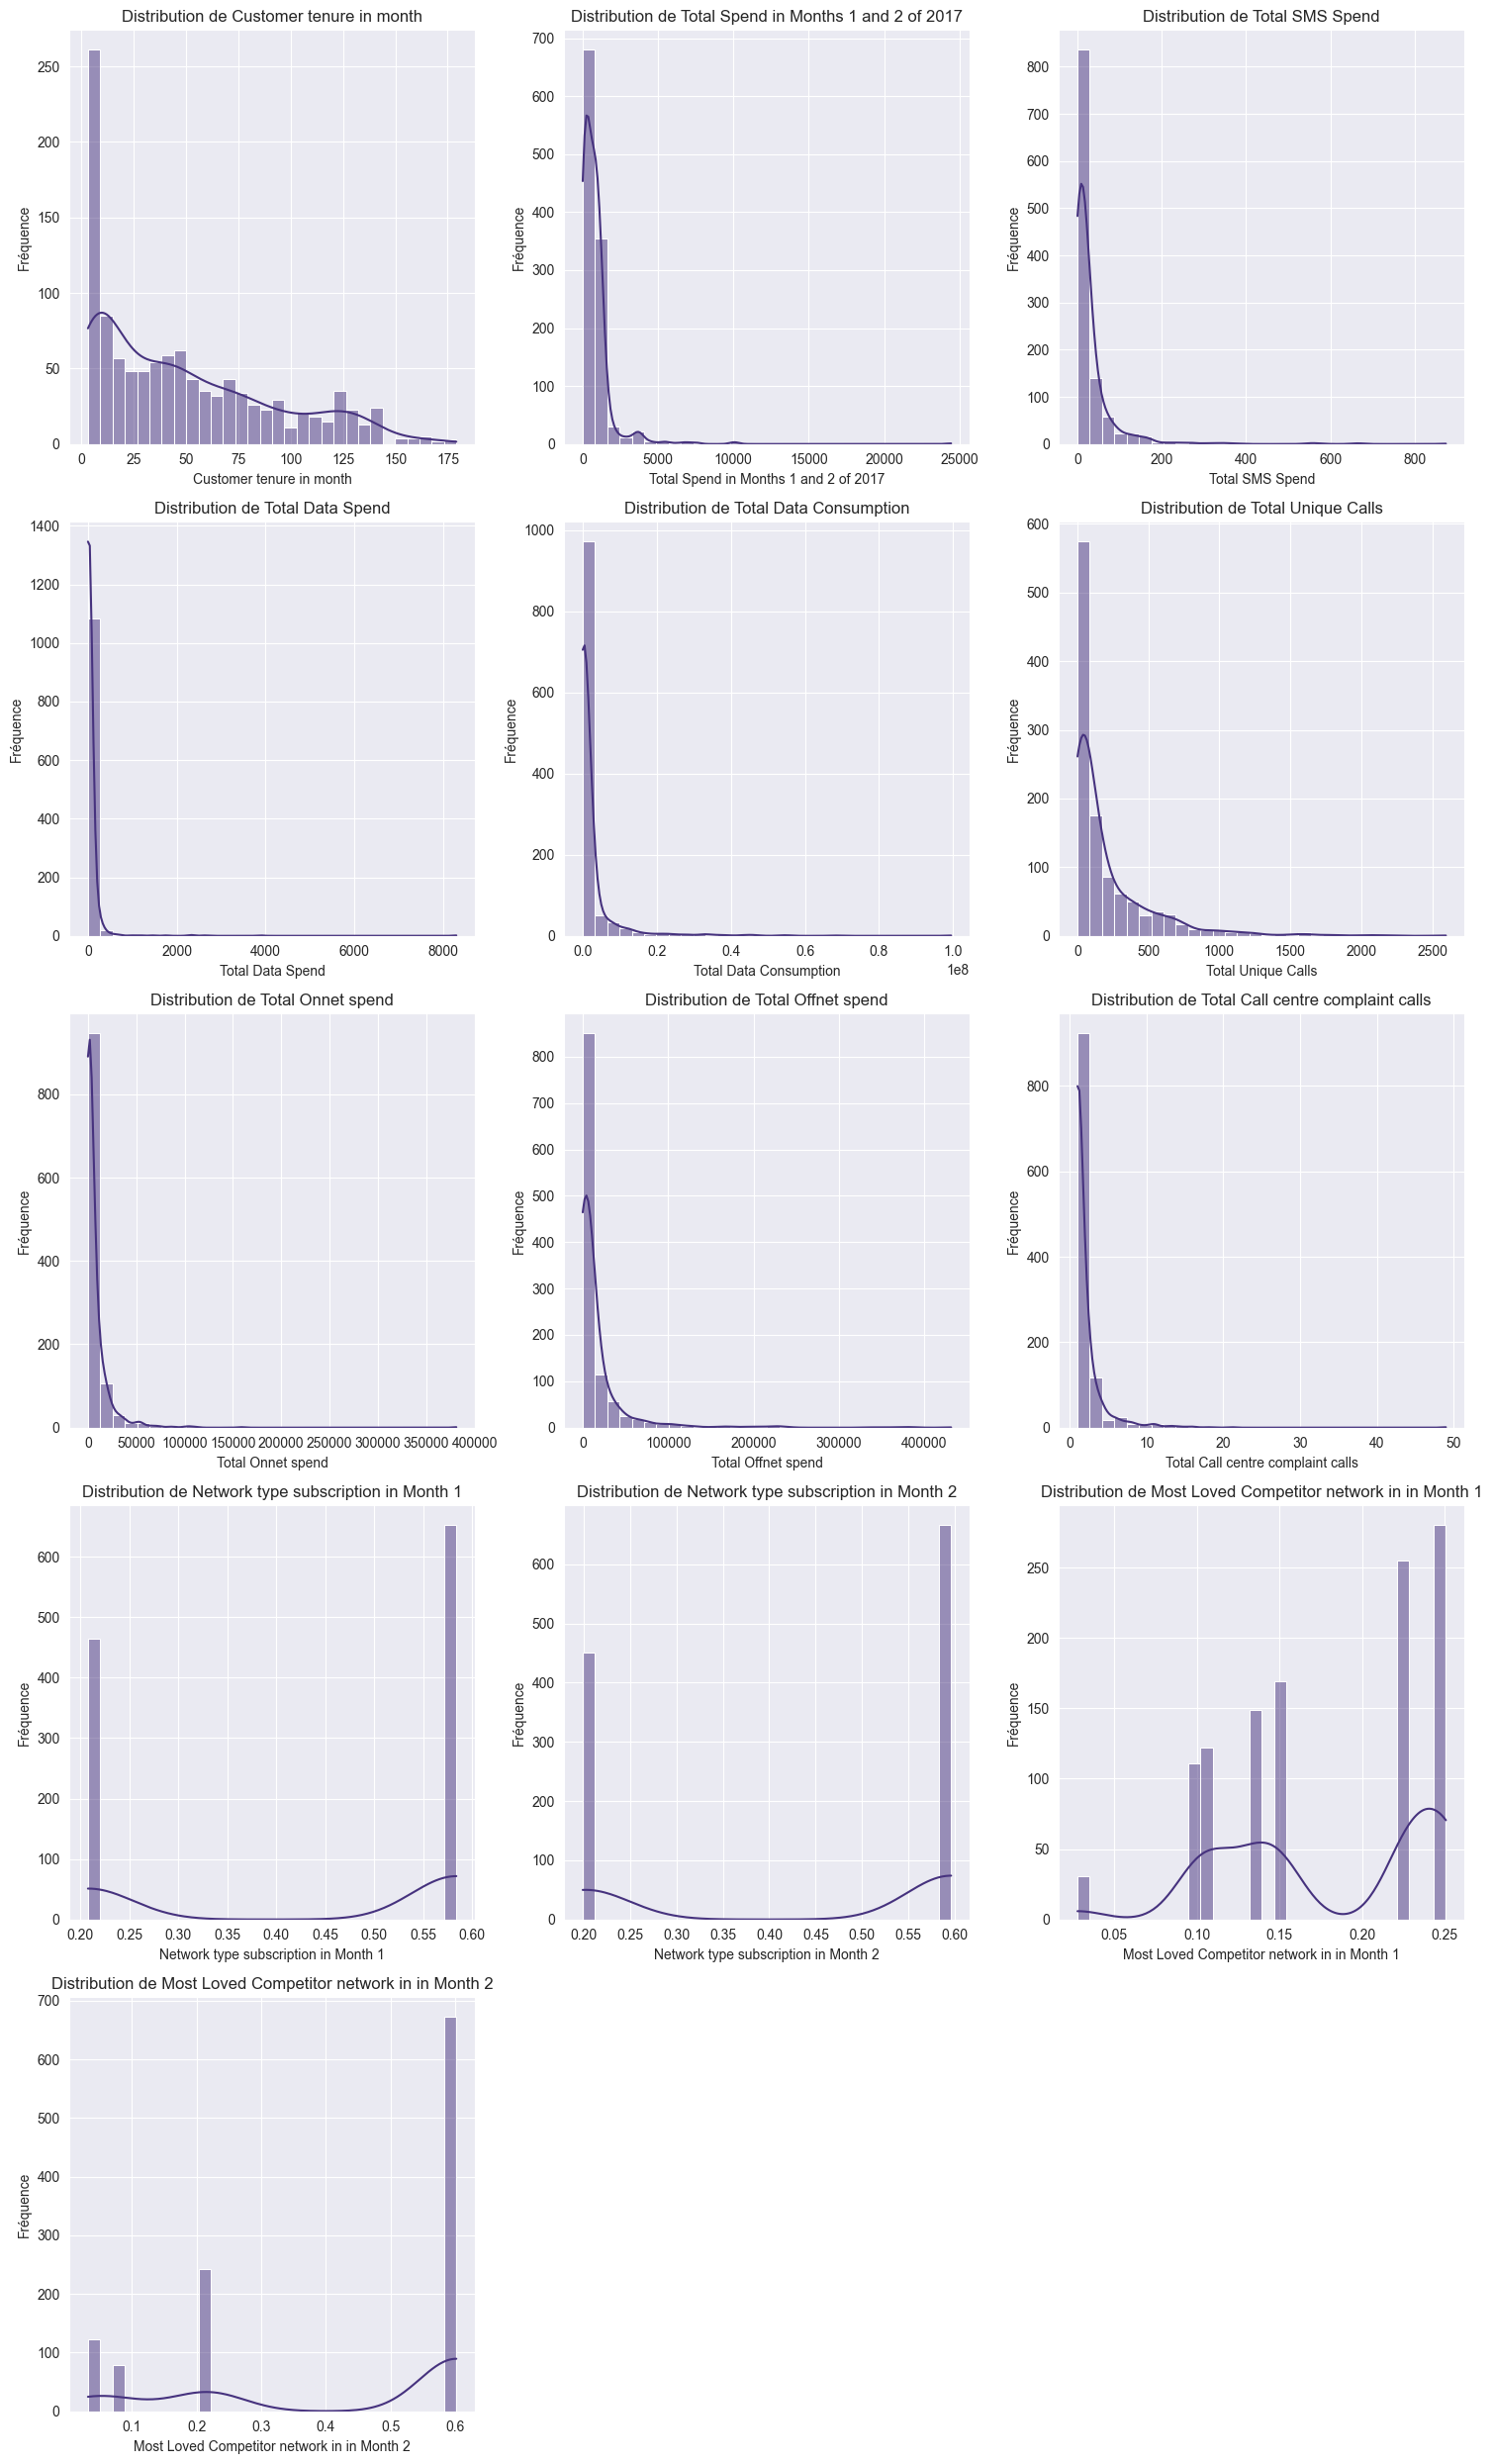

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df):
    # Définir le nombre de lignes et de colonnes en fonction du nombre de variables
    num_vars = len(df.columns)
    num_cols = 3  # Par exemple, afficher 3 colonnes par ligne
    num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

    # Créer une figure avec un sous-ensemble de subplots
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Afficher un histogramme ou un graphique de densité en fonction du type de la variable
        if df[column].dtype in ['float64', 'int64']:  # Si c'est une variable numérique
            sns.histplot(df[column], kde=True, bins=30)  # Histogramme avec courbe de densité
            plt.title(f'Distribution de {column}')
            plt.xlabel(column)
            plt.ylabel('Fréquence')
        else:  # Si c'est une variable catégorielle
            sns.countplot(x=df[column])
            plt.title(f'Distribution de {column}')
            plt.xlabel(column)
            plt.ylabel('Nombre de valeurs')
        
    # Ajuster l'espace entre les graphiques
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
plot_distributions(X_train)

#### Les distributions ne sont pas normales donc on va normaliser

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    # Sélectionner uniquement les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Initialiser le MinMaxScaler
    scaler = MinMaxScaler()
    
    # Appliquer le scaler aux colonnes numériques
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

# Exemple d'utilisation :
X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

In [267]:
# normalisation des donnees de test
X_test_normalized = normalize_data(X_test)

In [268]:
## Distribution de X_train_normalized
#plot_distributions(X_train_normalized)

In [269]:
# Concatenation 
data_train = pd.concat([X_train_normalized, y_train], axis=1)

## PPscore

In [270]:
import ppscore as pps
def calculer_pouvoir_predictif(df, target_variable, seuil=0.1):
    """
    Calcule le pouvoir prédictif de toutes les variables par rapport à une variable cible.
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        Le DataFrame contenant les données
    
    target_variable : str
        Le nom de la variable cible à prédire
    
    seuil : float, optionnel
        Seuil minimal du pouvoir prédictif (défaut: 0.1)
    
    Retourne:
    ---------
    tuple : (pandas.DataFrame, list)
        - Un DataFrame avec les variables et leurs pouvoirs prédictifs
        - Une liste des variables ayant un pouvoir prédictif supérieur au seuil
    """
    # Créer une copie du DataFrame pour éviter les modifications
    df_prepare = df.copy()
    
    # Calculer les scores PPS pour toutes les variables
    pps_scores = []
    for col in df_prepare.columns:
        if col != target_variable:
            try:
                score = pps.score(df_prepare, col, target_variable)['ppscore']
                pps_scores.append({'variable': col, 'pouvoir_predictif': score})
            except:
                # Gérer les cas où le calcul du PPS échoue
                pass
    
    # Créer un DataFrame à partir des scores
    df_pouvoir_predictif = pd.DataFrame(pps_scores)
    
    # Trier par pouvoir prédictif décroissant
    df_pouvoir_predictif = df_pouvoir_predictif.sort_values('pouvoir_predictif', ascending=False)
    
    # Sélectionner les variables ayant un pouvoir prédictif supérieur au seuil
    variables_significatives = df_pouvoir_predictif[
        df_pouvoir_predictif['pouvoir_predictif'] > seuil
    ]['variable'].tolist()
    
    return df_pouvoir_predictif, variables_significatives

In [271]:
# la variable cible
target_variable = "Churn Status"

# Calculer le pouvoir prédictif

df_pouvoir_predictif, variables_significatives = calculer_pouvoir_predictif(
    data_train, 
    target_variable
)

# Afficher le DataFrame des pouvoirs prédictifs
print("Tableau des pouvoirs prédictifs :")
print(df_pouvoir_predictif)

# Afficher les variables significatives
print("\nVariables avec un pouvoir prédictif significatif :")
print(variables_significatives)
print(len(variables_significatives))

Tableau des pouvoirs prédictifs :
                                       variable  pouvoir_predictif
1         Total Spend in Months 1 and 2 of 2017           0.475794
2                               Total SMS Spend           0.208779
7                            Total Offnet spend           0.103138
12  Most Loved Competitor network in in Month 2           0.091876
0                      Customer tenure in month           0.086000
4                        Total Data Consumption           0.075734
5                            Total Unique Calls           0.074226
8             Total Call centre complaint calls           0.035534
6                             Total Onnet spend           0.028360
11  Most Loved Competitor network in in Month 1           0.016847
3                              Total Data Spend           0.014703
10         Network type subscription in Month 2           0.007957
9          Network type subscription in Month 1           0.006826

Variables avec un pouvoir p

In [272]:
def visualiser_ppscore(df_pouvoir_predictif, top_n=20):
    """
    Visualise les PPS scores avec un graphique à barres horizontal.
    
    Paramètres:
    -----------
    df_pouvoir_predictif : pandas.DataFrame
        DataFrame contenant les variables et leurs pouvoirs prédictifs
    
    top_n : int, optionnel
        Nombre de variables à afficher (défaut: 15)
    """
    # Sélectionner les top N variables
    top_variables = df_pouvoir_predictif.head(top_n)
    
    # Créer le graphique
    plt.figure(figsize=(9, 6))
    
    # Graphique à barres horizontal avec palette de couleurs
    sns.barplot(
        x='pouvoir_predictif', 
        y='variable', 
        data=top_variables,
        palette='viridis'  # Palette de couleurs attrayante
    )
    
    plt.title('Top des Variables par Pouvoir Prédictif', fontsize=16)
    plt.xlabel('Predictive Power Score', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\Larry\AppData\Local\Temp\ipykernel_6844\2179772219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


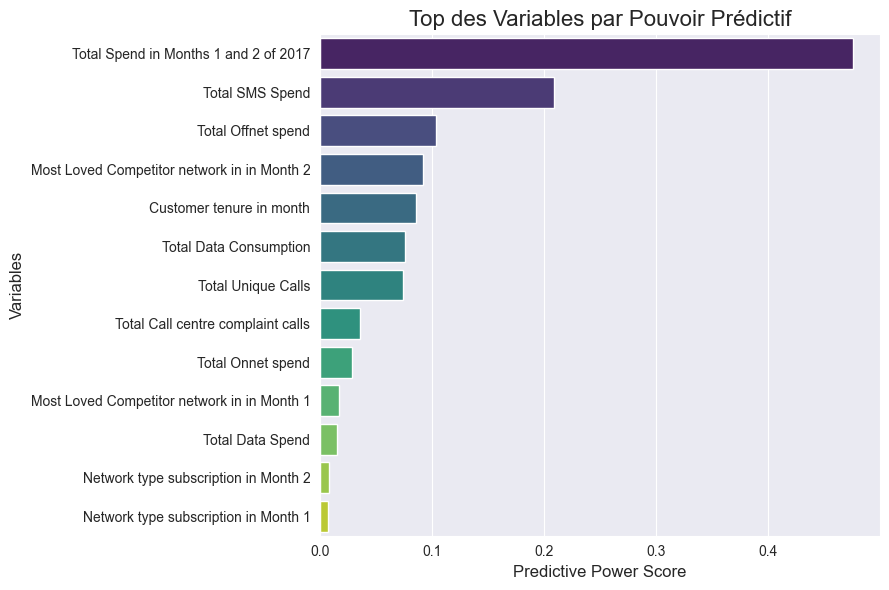

In [273]:
visualiser_ppscore(df_pouvoir_predictif)


## REGRESSION LOGISTIQUE

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [275]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_normalized, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [276]:
y_pred_train = model.predict(X_train_normalized)

In [277]:
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 0.6732318710832588
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       560
           1       0.70      0.61      0.65       557

    accuracy                           0.67      1117
   macro avg       0.68      0.67      0.67      1117
weighted avg       0.68      0.67      0.67      1117



In [278]:
y_pred_test = model.predict(X_test_normalized)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.6821428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       140
           1       0.68      0.69      0.69       140

    accuracy                           0.68       280
   macro avg       0.68      0.68      0.68       280
weighted avg       0.68      0.68      0.68       280



In [279]:
print(y_train.value_counts(normalize=True))

0    0.501343
1    0.498657
Name: Churn Status, dtype: float64


In [280]:
from sklearn.metrics import roc_auc_score, f1_score

print("F1 Score:", f1_score(y_train, y_pred_train))
print("ROC AUC:", roc_auc_score(y_train, model.predict_proba(X_train_normalized)[:, 1]))

F1 Score: 0.6500479386385426
ROC AUC: 0.7274236983842011


In [281]:
probas = model.predict_proba(X_train)[:, 1]  # Probabilité de churn
print(probas[:10])  # Afficher les 10 premières

[0.45188397 0.44113013 0.52139709 0.66752058 0.66587521 0.50055481
 0.49032027 0.82911294 0.35324039 0.29024759]


### Choix du meilleur modele

In [282]:
# Concatenation 
data_test = pd.concat([X_test_normalized, y_test], axis=1)

In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tabulate import tabulate

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced', max_depth = 10, min_samples_split = 5, n_estimators = 200),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Dictionnaire pour stocker les performances
results = {}


# Boucle sur chaque modèle
for name, model in models.items():
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)
    y_proba = model.predict_proba(X_test_normalized)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    results[name] = [accuracy, f1, auc_roc]

# Création du DataFrame des performances
performance_df = pd.DataFrame(results, index=["Accuracy", "F1-Score", "AUC-ROC"]).T

# Mise en forme avec Pandas Styler
styled_df = performance_df.style.format("{:.4f}") \
    .set_caption("📊 Comparaison des modèles de Machine Learning") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]
    }])

# Affichage du tableau avec tabulate
print(tabulate(performance_df, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# Identifier le meilleur modèle basé sur l'AUC-ROC
best_model = performance_df["AUC-ROC"].idxmax()
print(f"\n🏆 Le meilleur modèle est **{best_model}** avec un AUC-ROC de **{performance_df.loc[best_model, 'AUC-ROC']:.4f}**")


c:\Users\Larry\Desktop\HackStat_BI\CHURN\Larry_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


╒═════════════════════╤════════════╤════════════╤═══════════╕
│                     │   Accuracy │   F1-Score │   AUC-ROC │
╞═════════════════════╪════════════╪════════════╪═══════════╡
│ Logistic Regression │     0.6821 │     0.6855 │    0.7242 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ Random Forest       │     0.6357 │     0.6645 │    0.7149 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ XGBoost             │     0.6107 │     0.6540 │    0.6394 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ SVM                 │     0.6714 │     0.6489 │    0.7338 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ KNN                 │     0.6143 │     0.6115 │    0.6392 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ Naive Bayes         │     0.5036 │     0.5288 │    0.5148 │
╘═════════════════════╧════════════╧════════════╧═══════════╛

🏆 Le meilleur modèle est **SVM** avec un AUC-ROC de **0.7338**


In [284]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced'],
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }),
    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    "NaiveBayes": (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    })
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_normalized)
    y_proba = best_model.predict_proba(X_test_normalized)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


🔍 Optimisation de RandomForest en cours...
✅ RandomForest optimisé !
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

🔍 Optimisation de XGBoost en cours...


c:\Users\Larry\Desktop\HackStat_BI\CHURN\Larry_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost optimisé !
Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

🔍 Optimisation de SVM en cours...
✅ SVM optimisé !
Meilleurs paramètres : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

🔍 Optimisation de KNN en cours...
✅ KNN optimisé !
Meilleurs paramètres : {'n_neighbors': 7, 'weights': 'distance'}

🔍 Optimisation de NaiveBayes en cours...
✅ NaiveBayes optimisé !
Meilleurs paramètres : {'var_smoothing': 1e-09}

+----+--------------+---------------------------------------------------------------------------------------------+------------+------------+-----------+
|    | Modèle       | Meilleurs Paramètres                                                                        |   Accuracy |   F1-Score |   AUC-ROC |
+====+==============+=============================================================================================+============+============+===========+
|  0 | RandomForest | {'class_weight': 'balanced', 'max_depth': 1

In [285]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "SVM": (SVC(probability=True), {
        'C': np.linspace(9,11,20),
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']})
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=6, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_normalized)
    y_proba = best_model.predict_proba(X_test_normalized)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


🔍 Optimisation de SVM en cours...


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': np.linspace(10,100,10,dtype=int),
        'max_depth': np.linspace(1,10,10,dtype=int),
        'learning_rate': np.linspace(0.01,0.5,10),
        'subsample': np.linspace(0.1,1,10)
    })
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_normalized)
    y_proba = best_model.predict_proba(X_test_normalized)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition du modèle LightGBM et de la grille d’hyperparamètres
lgb_model = lgb.LGBMClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Application de GridSearchCV
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_normalized, y_train)

# Récupérer le meilleur modèle et les meilleurs hyperparamètres
best_lgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Prédiction et évaluation sur les données d'entraînement
y_pred = best_lgb_model.predict(X_test_normalized)
y_proba = best_lgb_model.predict_proba(X_test_normalized)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Affichage des résultats
print(f"✅ Meilleurs paramètres trouvés : {best_params}")
print(f"📊 Performance du modèle optimisé :")
print(f"- Accuracy : {round(accuracy, 4)}")
print(f"- F1-Score : {round(f1, 4)}")
print(f"- AUC-ROC : {round(auc, 4)}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 557, number of negative: 560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1806
[LightGBM] [Info] Number of data points in the train set: 1117, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498657 -> initscore=-0.005372
[LightGBM] [Info] Start training from score -0.005372
✅ Meilleurs paramètres trouvés : {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 20, 'subsample': 0.8}
📊 Performance du modèle optimisé :
- Accuracy : 0.625
- F1-Score : 0.6645
- AUC-ROC : 0.6657


In [286]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition du modèle Perceptron et de la grille d’hyperparamètres
perceptron_model = Perceptron()

param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000],
    'eta0': [0.01, 0.1, 1],  # Taux d'apprentissage initial
    'random_state': [42]
}

# Application de GridSearchCV
grid_search = GridSearchCV(perceptron_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_normalized, y_train)

# Récupérer le meilleur modèle et les meilleurs hyperparamètres
best_perceptron_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Prédiction et évaluation sur les données d'entraînement
y_pred = best_perceptron_model.predict(X_test_normalized)

# ⚠️ Le Perceptron ne fournit pas de probabilités, donc pas de AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print(f"✅ Meilleurs paramètres trouvés : {best_params}")
print(f"📊 Performance du modèle optimisé :")
print(f"- Accuracy : {round(accuracy, 4)}")
print(f"- F1-Score : {round(f1, 4)}")
print(f"⚠️ AUC-ROC non disponible pour Perceptron")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
✅ Meilleurs paramètres trouvés : {'alpha': 0.0001, 'eta0': 1, 'max_iter': 1000, 'penalty': None, 'random_state': 42}
📊 Performance du modèle optimisé :
- Accuracy : 0.5964
- F1-Score : 0.7095
⚠️ AUC-ROC non disponible pour Perceptron


In [287]:
# Création de la variable Total Spend
X_train["Total Spend"] = (
    X_train["Total SMS Spend"] + 
    X_train["Total Data Spend"] + 
    X_train["Total Unique Calls"] + 
    X_train["Total Onnet spend"] + 
    X_train["Total Offnet spend"]
)

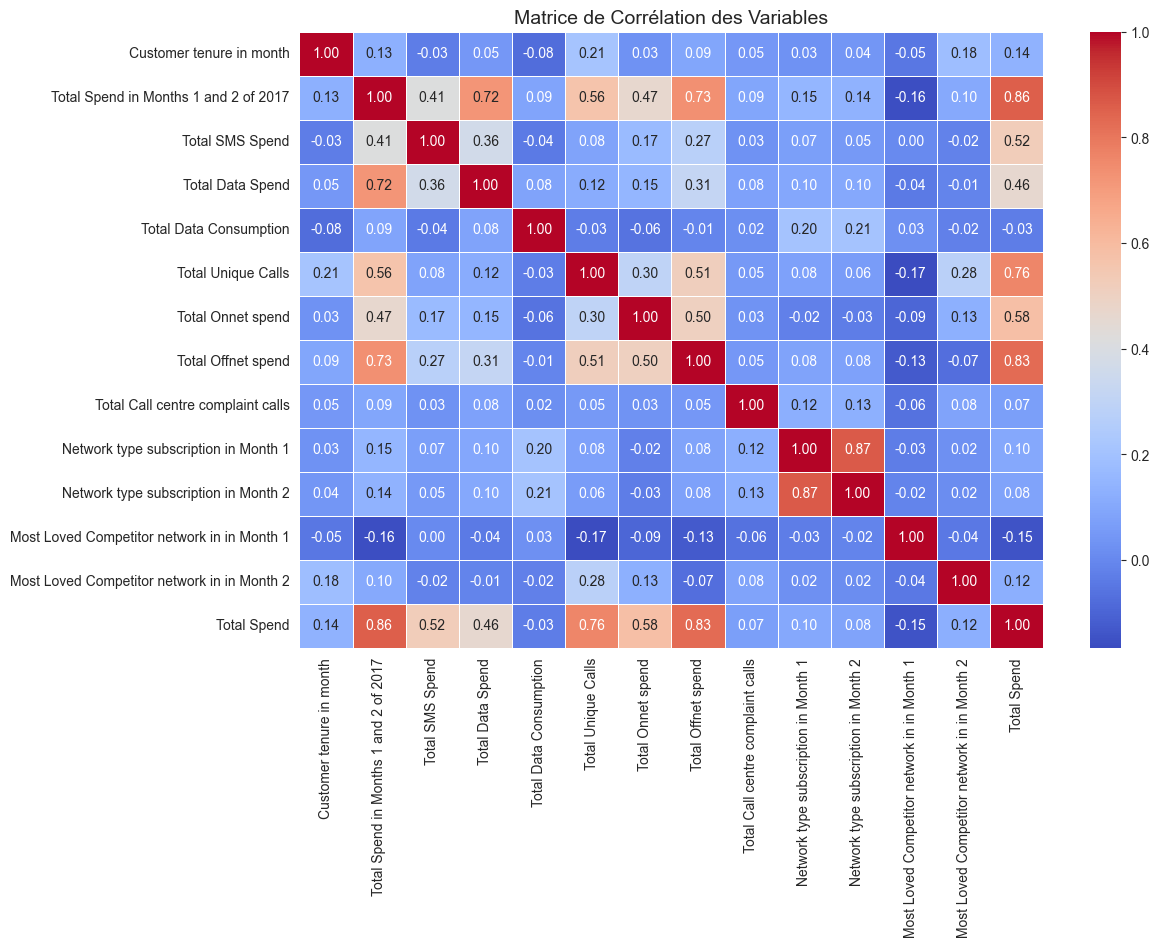

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = X_train.corr()

# Affichage avec un heatmap plus lisible
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Titre du graphique
plt.title("Matrice de Corrélation des Variables", fontsize=14)
plt.show()


In [290]:
nig

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,ADF1956,136,4.53,270.3344,6.58,2.50,7410.7529,62,9504,10820,1,3G,3G,PQza,Zintel,0
1396,ADF1965,1795,59.83,1024.8460,111.99,10.00,493671.9863,149,18202,40730,2,3G,3G,Mango,Zintel,0
1397,ADF1967,203,6.77,1143.4972,19.84,13.75,261.9307,284,360,81341,3,3G,3G,Zintel,Zintel,0
1398,ADF1971,109,3.63,45.0900,0.00,0.00,658162.2734,20,240,3611,1,3G,3G,Uxaa,Zintel,1


In [291]:
nig2 = nig

In [292]:
nig2["Total Spend"] = (
    nig2["Total SMS Spend"] + 
    nig2["Total Data Spend"] + 
    nig2["Total Unique Calls"]
)


C:\Users\Larry\AppData\Local\Temp\ipykernel_6844\1084322230.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = nig2.corr()


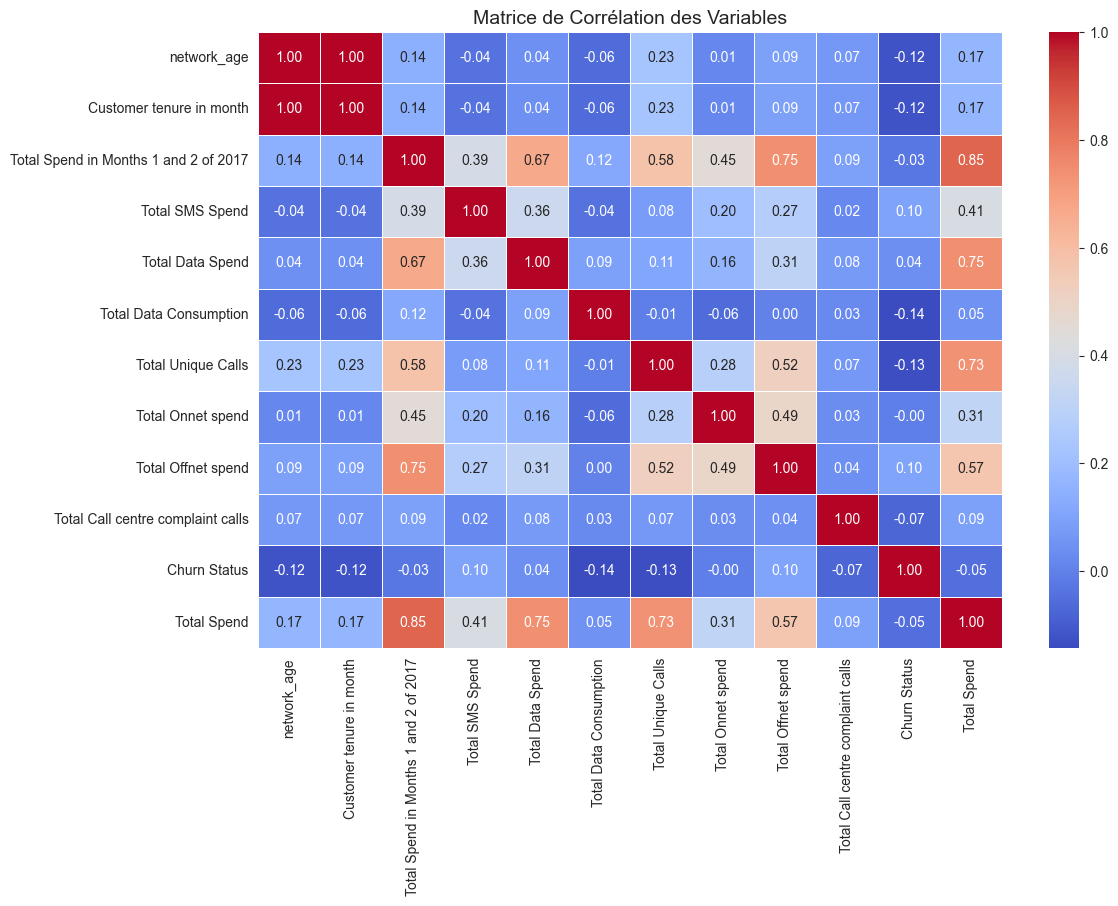

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = nig2.corr()

# Affichage avec un heatmap plus lisible
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Titre du graphique
plt.title("Matrice de Corrélation des Variables", fontsize=14)
plt.show()

# NEW TRY

In [339]:
df = nig_cleaned

In [340]:
df

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Total Spend
0,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0,15.25
1,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0,32.39
2,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0,123.76
3,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0,77.10
4,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0,193.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,4.53,270.3344,6.58,2.50,7410.7529,62,9504,10820,1,3G,3G,PQza,Zintel,0,71.08
1396,59.83,1024.8460,111.99,10.00,493671.9863,149,18202,40730,2,3G,3G,Mango,Zintel,0,270.99
1397,6.77,1143.4972,19.84,13.75,261.9307,284,360,81341,3,3G,3G,Zintel,Zintel,0,317.59
1398,3.63,45.0900,0.00,0.00,658162.2734,20,240,3611,1,3G,3G,Uxaa,Zintel,1,20.00


In [341]:
# Liste des variables à diviser
variables = [
    "Total SMS Spend", 
    "Total Data Spend", 
    "Total Unique Calls", 
    "Total Onnet spend", 
    "Total Offnet spend"
]

# Création des nouvelles variables en les divisant par "Total Spend in Months 1 and 2 of 2017"
for var in variables:
    df[f"{var}_ratio"] = df[var] / df["Total Spend in Months 1 and 2 of 2017"]

# Vérification des nouvelles colonnes
df.head()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Total Spend,Total SMS Spend_ratio,Total Data Spend_ratio,Total Unique Calls_ratio,Total Onnet spend_ratio,Total Offnet spend_ratio
0,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0,15.25,0.000000,0.016294,0.182496,7.351983,83.531037
1,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0,32.39,0.041865,0.012640,0.273030,16.442445,44.220673
2,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0,123.76,0.009420,0.003355,0.319352,27.939243,59.144460
3,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0,77.10,0.012920,0.002358,0.130140,12.866843,11.833270
4,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0,193.74,0.012614,0.277462,0.059553,6.112284,13.067331


In [342]:
# Liste des variables à supprimer
variables_a_supprimer = [
    "Total SMS Spend", 
    "Total Data Spend", 
    "Total Unique Calls", 
    "Total Onnet spend", 
    "Total Offnet spend",
    "Total Spend in Months 1 and 2 of 2017",
    "Total Spend"
]

# Suppression des colonnes du DataFrame
df.drop(columns=variables_a_supprimer, inplace=True)

# Vérification des colonnes restantes
df.head()

,Customer tenure in month,Total Data Consumption,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Total SMS Spend_ratio,Total Data Spend_ratio,Total Unique Calls_ratio,Total Onnet spend_ratio,Total Offnet spend_ratio
0,4.10,1.4951,2,2G,2G,Uxaa,Mango,0,0.000000,0.016294,0.182496,7.351983,83.531037
1,43.87,1.0244,1,2G,2G,Uxaa,Mango,0,0.041865,0.012640,0.273030,16.442445,44.220673
2,79.50,6.0898,1,2G,2G,Weematel,Mango,0,0.009420,0.003355,0.319352,27.939243,59.144460
3,53.80,3.3447,1,2G,2G,0,Mango,0,0.012920,0.002358,0.130140,12.866843,11.833270
4,72.50,673204.0342,1,2G,3G,Weematel,Mango,0,0.012614,0.277462,0.059553,6.112284,13.067331


In [343]:
from sklearn.model_selection import train_test_split

def stratified_split(data, target_column, test_size=0.2, random_state=None):
    """
    Sépare les données en sets de train et de test en maintenant l'équilibre de classes dans la variable cible.
    
    Parameters:
    - data : DataFrame, l'ensemble de données complet
    - target_column : str, le nom de la colonne cible à stratifier (par exemple 'Churn Status')
    - test_size : float, la proportion de données à inclure dans le test (par défaut 0.2)
    - random_state : int ou None, pour reproduire la séparation
    
    Returns:
    - X_train, X_test, y_train, y_test : ensembles de données séparés en fonction de la variable cible
    """
    # Séparation des caractéristiques (X) et de la variable cible (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Utilisation de la stratification pour assurer un équilibre de 1 et 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [344]:
X_train, X_test, y_train, y_test = stratified_split(df, target_column='Churn Status', test_size=0.2, random_state=42)

In [345]:
def frequency_encoding(df, columns):
    """
    Effectue un frequency encoding sur les colonnes spécifiées du DataFrame.
    
    Parameters:
    - df : DataFrame, le DataFrame contenant les colonnes à encoder
    - columns : list, la liste des noms des colonnes à encoder
    
    Returns:
    - df : DataFrame, avec les colonnes encodées
    """
    for column in columns:
        # Calcul des fréquences
        frequency = df[column].value_counts() / len(df)
        
        # Remplacer les valeurs par leurs fréquences
        df[column] = df[column].map(frequency)
    
    return df

# Exemple d'utilisation :
columns_to_encode = [
    'Network type subscription in Month 1', 
    'Network type subscription in Month 2',
    'Most Loved Competitor network in in Month 1',
    'Most Loved Competitor network in in Month 2'
]

# Appliquer le frequency encoding
X_train_normalized = frequency_encoding(X_train, columns_to_encode)
X_test_normalized = frequency_encoding(X_test, columns_to_encode)

In [346]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    # Sélectionner uniquement les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Initialiser le MinMaxScaler
    scaler = MinMaxScaler()
    
    # Appliquer le scaler aux colonnes numériques
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

# Exemple d'utilisation :
X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

In [347]:
# Concatenation 
data_train = pd.concat([X_train_normalized, y_train], axis=1)

In [93]:
import ppscore as pps
def calculer_pouvoir_predictif(df, target_variable, seuil=0.1):
    """
    Calcule le pouvoir prédictif de toutes les variables par rapport à une variable cible.
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        Le DataFrame contenant les données
    
    target_variable : str
        Le nom de la variable cible à prédire
    
    seuil : float, optionnel
        Seuil minimal du pouvoir prédictif (défaut: 0.1)
    
    Retourne:
    ---------
    tuple : (pandas.DataFrame, list)
        - Un DataFrame avec les variables et leurs pouvoirs prédictifs
        - Une liste des variables ayant un pouvoir prédictif supérieur au seuil
    """
    # Créer une copie du DataFrame pour éviter les modifications
    df_prepare = df.copy()
    
    # Calculer les scores PPS pour toutes les variables
    pps_scores = []
    for col in df_prepare.columns:
        if col != target_variable:
            try:
                score = pps.score(df_prepare, col, target_variable)['ppscore']
                pps_scores.append({'variable': col, 'pouvoir_predictif': score})
            except:
                # Gérer les cas où le calcul du PPS échoue
                pass
    
    # Créer un DataFrame à partir des scores
    df_pouvoir_predictif = pd.DataFrame(pps_scores)
    
    # Trier par pouvoir prédictif décroissant
    df_pouvoir_predictif = df_pouvoir_predictif.sort_values('pouvoir_predictif', ascending=False)
    
    # Sélectionner les variables ayant un pouvoir prédictif supérieur au seuil
    variables_significatives = df_pouvoir_predictif[
        df_pouvoir_predictif['pouvoir_predictif'] > seuil
    ]['variable'].tolist()
    
    return df_pouvoir_predictif, variables_significatives

ModuleNotFoundError: No module named 'ppscore'

In [349]:
# la variable cible
target_variable = "Churn Status"

# Calculer le pouvoir prédictif

df_pouvoir_predictif, variables_significatives = calculer_pouvoir_predictif(
    data_train, 
    target_variable
)

# Afficher le DataFrame des pouvoirs prédictifs
print("Tableau des pouvoirs prédictifs :")
print(df_pouvoir_predictif)

# Afficher les variables significatives
print("\nVariables avec un pouvoir prédictif significatif :")
print(variables_significatives)
print(len(variables_significatives))

Tableau des pouvoirs prédictifs :
                                       variable  pouvoir_predictif
7                         Total SMS Spend_ratio           0.103613
6   Most Loved Competitor network in in Month 2           0.091876
0                      Customer tenure in month           0.086000
1                        Total Data Consumption           0.075734
8                        Total Data Spend_ratio           0.070788
11                     Total Offnet spend_ratio           0.063930
2             Total Call centre complaint calls           0.035534
9                      Total Unique Calls_ratio           0.027849
5   Most Loved Competitor network in in Month 1           0.016847
4          Network type subscription in Month 2           0.007957
3          Network type subscription in Month 1           0.006826
10                      Total Onnet spend_ratio           0.003957

Variables avec un pouvoir prédictif significatif :
['Total SMS Spend_ratio']
1


In [350]:
def visualiser_ppscore(df_pouvoir_predictif, top_n=20):
    """
    Visualise les PPS scores avec un graphique à barres horizontal.
    
    Paramètres:
    -----------
    df_pouvoir_predictif : pandas.DataFrame
        DataFrame contenant les variables et leurs pouvoirs prédictifs
    
    top_n : int, optionnel
        Nombre de variables à afficher (défaut: 15)
    """
    # Sélectionner les top N variables
    top_variables = df_pouvoir_predictif.head(top_n)
    
    # Créer le graphique
    plt.figure(figsize=(9, 6))
    
    # Graphique à barres horizontal avec palette de couleurs
    sns.barplot(
        x='pouvoir_predictif', 
        y='variable', 
        data=top_variables,
        palette='viridis'  # Palette de couleurs attrayante
    )
    
    plt.title('Top des Variables par Pouvoir Prédictif', fontsize=16)
    plt.xlabel('Predictive Power Score', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\Larry\AppData\Local\Temp\ipykernel_6844\2179772219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


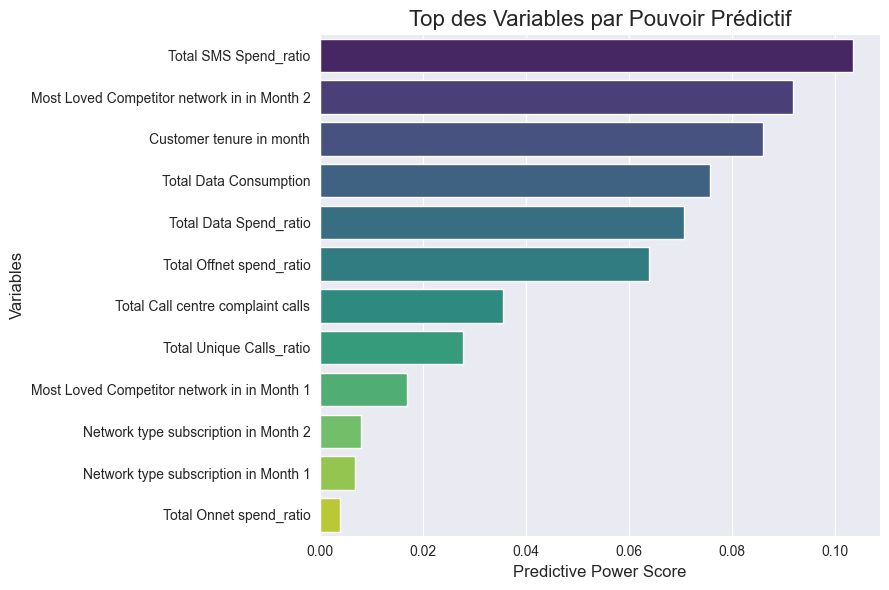

In [351]:
visualiser_ppscore(df_pouvoir_predictif)

In [352]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tabulate import tabulate

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced', max_depth = 10, min_samples_split = 5, n_estimators = 200),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Dictionnaire pour stocker les performances
results = {}


# Boucle sur chaque modèle
for name, model in models.items():
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)
    y_proba = model.predict_proba(X_test_normalized)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    results[name] = [accuracy, f1, auc_roc]

# Création du DataFrame des performances
performance_df = pd.DataFrame(results, index=["Accuracy", "F1-Score", "AUC-ROC"]).T

# Mise en forme avec Pandas Styler
styled_df = performance_df.style.format("{:.4f}") \
    .set_caption("📊 Comparaison des modèles de Machine Learning") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]
    }])

# Affichage du tableau avec tabulate
print(tabulate(performance_df, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# Identifier le meilleur modèle basé sur l'AUC-ROC
best_model = performance_df["AUC-ROC"].idxmax()
print(f"\n🏆 Le meilleur modèle est **{best_model}** avec un AUC-ROC de **{performance_df.loc[best_model, 'AUC-ROC']:.4f}**")


c:\Users\Larry\Desktop\HackStat_BI\CHURN\Larry_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


╒═════════════════════╤════════════╤════════════╤═══════════╕
│                     │   Accuracy │   F1-Score │   AUC-ROC │
╞═════════════════════╪════════════╪════════════╪═══════════╡
│ Logistic Regression │     0.7357 │     0.7500 │    0.7939 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ Random Forest       │     0.7571 │     0.7718 │    0.8134 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ XGBoost             │     0.7036 │     0.7414 │    0.7984 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ SVM                 │     0.7214 │     0.7400 │    0.8005 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ KNN                 │     0.7000 │     0.7219 │    0.7486 │
├─────────────────────┼────────────┼────────────┼───────────┤
│ Naive Bayes         │     0.6464 │     0.6972 │    0.6817 │
╘═════════════════════╧════════════╧════════════╧═══════════╛

🏆 Le meilleur modèle est **Random Forest** avec un AUC-ROC de **0.813

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced'],
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }),
    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    "NaiveBayes": (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    })
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_normalized)
    y_proba = best_model.predict_proba(X_test_normalized)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


🔍 Optimisation de RandomForest en cours...
✅ RandomForest optimisé !
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

🔍 Optimisation de XGBoost en cours...


c:\Users\Larry\Desktop\HackStat_BI\CHURN\Larry_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost optimisé !
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

🔍 Optimisation de SVM en cours...
✅ SVM optimisé !
Meilleurs paramètres : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

🔍 Optimisation de KNN en cours...
✅ KNN optimisé !
Meilleurs paramètres : {'n_neighbors': 7, 'weights': 'distance'}

🔍 Optimisation de NaiveBayes en cours...
✅ NaiveBayes optimisé !
Meilleurs paramètres : {'var_smoothing': 1e-09}

+----+--------------+---------------------------------------------------------------------------------------------+------------+------------+-----------+
|    | Modèle       | Meilleurs Paramètres                                                                        |   Accuracy |   F1-Score |   AUC-ROC |
+====+==============+=============================================================================================+============+============+===========+
|  0 | RandomForest | {'class_weight': 'balanced', 'max_depth': 10

### SVM

In [324]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "SVM": (SVC(probability=True), {
        'C': np.linspace(9,11,20),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']})
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=6, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_normalized)
    y_proba = best_model.predict_proba(X_test_normalized)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))

🔍 Optimisation de SVM en cours...
✅ SVM optimisé !
Meilleurs paramètres : {'C': 10.789473684210526, 'gamma': 'auto', 'kernel': 'rbf'}

+----+----------+-------------------------------------------------------------+------------+------------+-----------+
|    | Modèle   | Meilleurs Paramètres                                        |   Accuracy |   F1-Score |   AUC-ROC |
+====+==========+=============================================================+============+============+===========+
|  0 | SVM      | {'C': 10.789473684210526, 'gamma': 'auto', 'kernel': 'rbf'} |     0.6964 |     0.7302 |    0.7887 |
+----+----------+-------------------------------------------------------------+------------+------------+-----------+


### Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tabulate import tabulate

# Définition du modèle et de la grille d’hyperparamètres pour Random Forest
rf_model = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': np.linspace(10, 500, 15, dtype = int),
    'max_depth': [5, 10, 20, 30, 40, 50, None],
    'min_samples_split': np.linspace(1, 20, 15, dtype = int),
    'class_weight': ['balanced']
}

# Optimisation avec GridSearchCV
print("🔍 Optimisation de Random Forest en cours...")
grid_search_rf = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_normalized, y_train)

# Meilleur modèle et paramètres
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Prédiction et évaluation
y_pred_rf = best_rf.predict(X_test_normalized)
y_proba_rf = best_rf.predict_proba(X_test_normalized)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Stockage des résultats
results_rf = {
    "Modèle": "Random Forest",
    "Meilleurs Paramètres": best_rf_params,
    "Accuracy": round(accuracy_rf, 4),
    "F1-Score": round(f1_rf, 4),
    "AUC-ROC": round(auc_rf, 4)
}

# Affichage des résultats
print(f"✅ Optimisation terminée !\nMeilleurs paramètres : {best_rf_params}\n")
print(tabulate([results_rf.values()], headers=results_rf.keys(), tablefmt="grid"))

🔍 Optimisation de Random Forest en cours...
✅ Optimisation terminée !
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

+---------------+-----------------------------------------------------------------------------------------------+------------+------------+-----------+
| Modèle        | Meilleurs Paramètres                                                                          |   Accuracy |   F1-Score |   AUC-ROC |
+===============+===============================================================================================+============+============+===========+
| Random Forest | {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200} |     0.7393 |     0.7607 |    0.8191 |
+---------------+-----------------------------------------------------------------------------------------------+------------+------------+-----------+


### XGBoost

In [358]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': np.linspace(10,500,15,dtype=int),
        'max_depth': np.linspace(1,20,15,dtype=int),
        'learning_rate': np.linspace(0.01,0.5,10),
        'subsample': np.linspace(0.1,1,10)
    })
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_normalized)
    y_proba = best_model.predict_proba(X_test_normalized)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


🔍 Optimisation de XGBoost en cours...


KeyboardInterrupt: 

### Perceptron

In [357]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition du modèle Perceptron et de la grille d’hyperparamètres
perceptron_model = Perceptron()

param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000],
    'eta0': [0.01, 0.1, 1],  # Taux d'apprentissage initial
    'random_state': [42]
}

# Application de GridSearchCV
grid_search = GridSearchCV(perceptron_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_normalized, y_train)

# Récupérer le meilleur modèle et les meilleurs hyperparamètres
best_perceptron_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Prédiction et évaluation sur les données d'entraînement
y_pred = best_perceptron_model.predict(X_test_normalized)

# ⚠️ Le Perceptron ne fournit pas de probabilités, donc pas de AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print(f"✅ Meilleurs paramètres trouvés : {best_params}")
print(f"📊 Performance du modèle optimisé :")
print(f"- Accuracy : {round(accuracy, 4)}")
print(f"- F1-Score : {round(f1, 4)}")
print(f"⚠️ AUC-ROC non disponible pour Perceptron")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
✅ Meilleurs paramètres trouvés : {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 42}
📊 Performance du modèle optimisé :
- Accuracy : 0.7214
- F1-Score : 0.7111
⚠️ AUC-ROC non disponible pour Perceptron


# Implementation du pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ------------------------------
# Variables catégorielles
# ------------------------------
cat_features = [
    'Network type subscription in Month 1', 
    'Network type subscription in Month 2', 
    'Most Loved Competitor network in in Month 1', 
    'Most Loved Competitor network in in Month 2'
]


class ImputeByIQR(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """
        Cette méthode calcule les bornes IQR pour chaque variable quantitative.
        """
        # Sélection des colonnes quantitatives
        self.quant_columns = X.select_dtypes(include=[np.number]).columns
        
        # Calcul des bornes IQR pour chaque variable quantitative
        self.lower_bounds = {}
        self.upper_bounds = {}
        
        for col in self.quant_columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[col] = Q1 - 1.5 * IQR
            self.upper_bounds[col] = Q3 + 1.5 * IQR
        
        return self

    def transform(self, X):
        """
        Cette méthode remplace les valeurs manquantes par la médiane dans les bornes IQR.
        """
        X = X.copy()
        
        # Imputation des valeurs manquantes par la médiane des données dans les bornes IQR
        for col in self.quant_columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = self.lower_bounds[col]
            upper_bound = self.upper_bounds[col]
            
            # Remplacer les valeurs manquantes (NaN) par la médiane des données dans les bornes IQR
            median_value = X[col].median()
            
            # Remplacer les NaN par la médiane pour chaque variable
            X[col] = X[col].fillna(median_value)
            
            # Traiter les valeurs qui sont en dehors des bornes IQR (si elles sont aberrantes)
            X[col] = np.clip(X[col], lower_bound, upper_bound)
        
        return X

# ------------------------------
# Étape 1 : Traitement des variables catégorielles
# ------------------------------
class CustomCategoricalImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_1 = X[cat_features[0]].mode()[0]
        self.most_frequent_2 = X[cat_features[1]].mode()[0]
        self.most_frequent_comp_1 = X[cat_features[2]].mode()[0]
        self.most_frequent_comp_2 = X[cat_features[3]].mode()[0]
        return self

    def transform(self, X):
        X = X.copy()
        for col in cat_features[2:]:
            X[col].replace('0', 'Aucun', inplace=True)
            X[col].fillna('Aucun', inplace=True)

        mask1 = X[cat_features[0]].isna() & X[cat_features[1]].notna()
        mask2 = X[cat_features[1]].isna() & X[cat_features[0]].notna()
        X.loc[mask1, cat_features[0]] = X.loc[mask1, cat_features[1]]
        X.loc[mask2, cat_features[1]] = X.loc[mask2, cat_features[0]]

        X[cat_features[0]].fillna(self.most_frequent_1, inplace=True)
        X[cat_features[1]].fillna(self.most_frequent_2, inplace=True)
        X[cat_features[2]].fillna(self.most_frequent_comp_1, inplace=True)
        X[cat_features[3]].fillna(self.most_frequent_comp_2, inplace=True)
        return X

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.freq_maps = {col: X[col].value_counts(normalize=True).to_dict() for col in cat_features}
        return self

    def transform(self, X):
        X = X.copy()
        for col in cat_features:
            X[col] = X[col].map(self.freq_maps[col])
        return X

# ------------------------------
# Étape 2 : Traitement des variables quantitatives
# ------------------------------
class CleanColumnNames(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.columns = X.columns.str.replace(" ", " ")
        return X




class CreateAdditionalFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # 1. Consistent competitor
        X['Consistent_competitor'] = (
            X['Most Loved Competitor network in in Month 1'] == 
            X['Most Loved Competitor network in in Month 2']
        ).astype(int)

        # 2. Network Upgrade
        def upgrade_status(row):
            m1, m2 = row['Network type subscription in Month 1'], row['Network type subscription in Month 2']
            if m1 == '2G' and m2 == '3G':
                return 1
            elif m1 == '3G' and m2 == '2G':
                return -1
            else:
                return 0
        X['Network_Upgrade'] = X.apply(upgrade_status, axis=1)

        # 3. Offnet/Onnet ratio
        if 'Total Offnet spend' in X.columns and 'Total Onnet spend' in X.columns:
            ratio_offnet = X['Total Offnet spend'] / X['Total Onnet spend'].replace(0, np.nan)
            max_offnet = ratio_offnet[ratio_offnet.notna()].max()
            X['Offnet_Onnet_ratio'] = ratio_offnet.fillna(max_offnet)

        # 4. SMS/Data ratio
        if 'Total SMS Spend' in X.columns and 'Total Data Spend' in X.columns:
            ratio_sms_data = X['Total SMS Spend'] / X['Total Data Spend'].replace(0, np.nan)
            max_sms_data = ratio_sms_data[ratio_sms_data.notna()].max()
            X['SMS_Data_ratio'] = ratio_sms_data.fillna(max_sms_data)

        return X


class CreateRatios(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        base = "Total Spend in Months 1 and 2 of 2017"
        variables = [
            "Total SMS Spend", 
            "Total Data Spend", 
            "Total Unique Calls", 
            "Total Onnet spend", 
            "Total Offnet spend"
        ]
        variables_suppr = ['network_age', 'Customer ID']
        for var in variables:
            if var in X.columns:
                X[f"{var}_ratio"] = X[var] / X[base].replace(0, np.nan)
        X.drop(columns=variables + variables_suppr, inplace=True, errors='ignore')
        return X

class ScaleQuantVars(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.columns = X.select_dtypes(include=[np.number]).columns
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.columns] = self.scaler.transform(X[self.columns])
        return X



# ------------------------------
# Étape 3 : Pipeline global
# ------------------------------
class FullPreprocessingPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cat_pipeline = Pipeline([
            ('imputer', CustomCategoricalImputer()),
            ('freq_encoder', FrequencyEncoder())
        ])
        self.quant_pipeline = Pipeline([
            ('imputer', ImputeByIQR()),
            ("clean_columns", CleanColumnNames()),
            ("add_features", CreateAdditionalFeatures()),
            ("create_ratios", CreateRatios()),
            ("scale_vars", ScaleQuantVars())
        ])

    def fit(self, X, y=None):
        X_clean = self.quant_pipeline.fit_transform(X.copy())
        self.cat_pipeline.fit(X_clean[cat_features])
        return self

    def transform(self, X):
        X = self.quant_pipeline.transform(X.copy())
        X_cat = self.cat_pipeline.transform(X[cat_features])
        X[cat_features] = X_cat
        return X

# ------------------------------
# Utilisation
# ------------------------------
pipeline = FullPreprocessingPipeline()
# df_final = pipeline.fit_transform(df1)


In [26]:
# from sklearn.pipeline import Pipeline
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # ------------------------------
# # Variables catégorielles
# # ------------------------------
# cat_features = [
#     'Network type subscription in Month 1', 
#     'Network type subscription in Month 2', 
#     'Most Loved Competitor network in in Month 1', 
#     'Most Loved Competitor network in in Month 2'
# ]


# class ImputeByIQR(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         """
#         Cette méthode calcule les bornes IQR pour chaque variable quantitative.
#         """
#         # Sélection des colonnes quantitatives
#         self.quant_columns = X.select_dtypes(include=[np.number]).columns
        
#         # Calcul des bornes IQR pour chaque variable quantitative
#         self.lower_bounds = {}
#         self.upper_bounds = {}
        
#         for col in self.quant_columns:
#             Q1 = X[col].quantile(0.25)
#             Q3 = X[col].quantile(0.75)
#             IQR = Q3 - Q1
#             self.lower_bounds[col] = Q1 - 1.5 * IQR
#             self.upper_bounds[col] = Q3 + 1.5 * IQR
        
#         return self

#     def transform(self, X):
#         """
#         Cette méthode remplace les valeurs manquantes par la médiane dans les bornes IQR.
#         """
#         X = X.copy()
        
#         # Imputation des valeurs manquantes par la médiane des données dans les bornes IQR
#         for col in self.quant_columns:
#             Q1 = X[col].quantile(0.25)
#             Q3 = X[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = self.lower_bounds[col]
#             upper_bound = self.upper_bounds[col]
            
#             # Remplacer les valeurs manquantes (NaN) par la médiane des données dans les bornes IQR
#             median_value = X[col].median()
            
#             # Remplacer les NaN par la médiane pour chaque variable
#             X[col] = X[col].fillna(median_value)
            
#             # Traiter les valeurs qui sont en dehors des bornes IQR (si elles sont aberrantes)
#             X[col] = np.clip(X[col], lower_bound, upper_bound)
        
#         return X

# # ------------------------------
# # Étape 1 : Traitement des variables catégorielles
# # ------------------------------
# class CustomCategoricalImputer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         self.most_frequent_1 = X[cat_features[0]].mode()[0]
#         self.most_frequent_2 = X[cat_features[1]].mode()[0]
#         self.most_frequent_comp_1 = X[cat_features[2]].mode()[0]
#         self.most_frequent_comp_2 = X[cat_features[3]].mode()[0]
#         return self

#     def transform(self, X):
#         X = X.copy()
#         for col in cat_features[2:]:
#             X[col].replace('0', 'Aucun', inplace=True)
#             X[col].fillna('Aucun', inplace=True)

#         mask1 = X[cat_features[0]].isna() & X[cat_features[1]].notna()
#         mask2 = X[cat_features[1]].isna() & X[cat_features[0]].notna()
#         X.loc[mask1, cat_features[0]] = X.loc[mask1, cat_features[1]]
#         X.loc[mask2, cat_features[1]] = X.loc[mask2, cat_features[0]]

#         X[cat_features[0]].fillna(self.most_frequent_1, inplace=True)
#         X[cat_features[1]].fillna(self.most_frequent_2, inplace=True)
#         X[cat_features[2]].fillna(self.most_frequent_comp_1, inplace=True)
#         X[cat_features[3]].fillna(self.most_frequent_comp_2, inplace=True)
#         return X

# class CreateNetworkAndCompetitorFeatures(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         X = X.copy()
        
#         # Création des variables pour 'Network type subscription in Month 1' et 'Network type subscription in Month 2'
#         X['2G'] = np.where((X['Network type subscription in Month 1'] == '2G') & (X['Network type subscription in Month 2'] == '2G'), 1, 0)
#         X['3G'] = np.where((X['Network type subscription in Month 1'] == '3G') & (X['Network type subscription in Month 2'] == '3G'), 1, 0)
#         X['Other'] = np.where((X['Network type subscription in Month 1'] != '2G') & (X['Network type subscription in Month 1'] != '3G') & 
#                               (X['Network type subscription in Month 2'] != '2G') & (X['Network type subscription in Month 2'] != '3G'), 1, 0)
        
#         # Création des variables pour Month 2
#         #X['2G_2'] = np.where(X['Network type subscription in Month 2'] == '2G', 1, 0)
#         X['3G_2'] = np.where(X['Network type subscription in Month 2'] == '3G', 1, 0)
#         # X['Other_2'] = np.where((X['Network type subscription in Month 2'] != '2G') & (X['Network type subscription in Month 2'] != '3G'), 1, 0)
        
#         # Création des variables pour 'Most Loved Competitor network in in Month 1' et 'Most Loved Competitor network in in Month 2'
#         X['Mango'] = np.where((X['Most Loved Competitor network in in Month 1'] == 'Mango') & (X['Most Loved Competitor network in in Month 2'] == 'Mango'), 1, 0)
#         X['PQza'] = np.where((X['Most Loved Competitor network in in Month 1'] == 'PQza') & (X['Most Loved Competitor network in in Month 2'] == 'PQza'), 1, 0)
#         X['ToCall'] = np.where((X['Most Loved Competitor network in in Month 1'] == 'ToCall') & (X['Most Loved Competitor network in in Month 2'] == 'ToCall'), 1, 0)
#         X['Uxaa'] = np.where((X['Most Loved Competitor network in in Month 1'] == 'Uxaa') & (X['Most Loved Competitor network in in Month 2'] == 'Uxaa'), 1, 0)
#         X['Weematel'] = np.where((X['Most Loved Competitor network in in Month 1'] == 'Weematel') & (X['Most Loved Competitor network in in Month 2'] == 'Weematel'), 1, 0)
#         X['Zintel'] = np.where((X['Most Loved Competitor network in in Month 1'] == 'Zintel') & (X['Most Loved Competitor network in in Month 2'] == 'Zintel'), 1, 0)
        
#         # Création des variables pour Month 2
#         X['Mango_2'] = np.where(X['Most Loved Competitor network in in Month 2'] == 'Mango', 1, 0)
#         X['PQza_2'] = np.where(X['Most Loved Competitor network in in Month 2'] == 'PQza', 1, 0)
#         X['ToCall_2'] = np.where(X['Most Loved Competitor network in in Month 2'] == 'ToCall', 1, 0)
#         X['Uxaa_2'] = np.where(X['Most Loved Competitor network in in Month 2'] == 'Uxaa', 1, 0)
#         X['Weematel_2'] = np.where(X['Most Loved Competitor network in in Month 2'] == 'Weematel', 1, 0)
#         X['Zintel_2'] = np.where(X['Most Loved Competitor network in in Month 2'] == 'Zintel', 1, 0)

#         # Suppression des variables d'origine
#         X.drop(columns=['Network type subscription in Month 1', 'Network type subscription in Month 2', 
#                         'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2'], inplace=True)
        
#         return X

# class CreateRatios(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         X = X.copy()

#         # 1. Consistent competitor
#         X['Consistent_competitor'] = (
#             X['Most Loved Competitor network in in Month 1'] == 
#             X['Most Loved Competitor network in in Month 2']
#         ).astype(int)

#         # 2. Network Upgrade
#         def upgrade_status(row):
#             m1, m2 = row['Network type subscription in Month 1'], row['Network type subscription in Month 2']
#             if m1 == '2G' and m2 == '3G':
#                 return 1
#             elif m1 == '3G' and m2 == '2G':
#                 return -1
#             else:
#                 return 0
#         X['Network_Upgrade'] = X.apply(upgrade_status, axis=1)

#         # 3. Offnet/Onnet ratio
#         if 'Total Offnet spend' in X.columns and 'Total Onnet spend' in X.columns:
#             ratio_offnet = X['Total Offnet spend'] / X['Total Onnet spend'].replace(0, np.nan)
#             max_offnet = ratio_offnet[ratio_offnet.notna()].max()
#             X['Offnet_Onnet_ratio'] = ratio_offnet.fillna(max_offnet)

#         # 4. SMS/Data ratio
#         if 'Total SMS Spend' in X.columns and 'Total Data Spend' in X.columns:
#             ratio_sms_data = X['Total SMS Spend'] / X['Total Data Spend'].replace(0, np.nan)
#             max_sms_data = ratio_sms_data[ratio_sms_data.notna()].max()
#             X['SMS_Data_ratio'] = ratio_sms_data.fillna(max_sms_data)

#         return X
    
# class CreateRatios2(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X = X.copy()
#         base = "Total Spend in Months 1 and 2 of 2017"
#         variables = [
#             "Total SMS Spend", 
#             "Total Data Spend", 
#             "Total Unique Calls", 
#             "Total Onnet spend", 
#             "Total Offnet spend"
#         ]
#         variables_suppr = ['Customer ID', 'network_age']
#         # for var in variables:
#         #     if var in X.columns:
#         #         X[f"{var}_ratio"] = X[var] / X[base].replace(0, np.nan)
#         X.drop(columns=variables_suppr, inplace=True, errors='ignore')
#         return X


# class CleanColumnNames(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X.columns = X.columns.str.replace(" ", " ")
#         return X

# class FixADF1623(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X = X.copy()
#         mask = X["Customer ID"] == "ADF1623"
#         for col in ["network_age", "Customertenureinmonth"]:
#             if col in X.columns:
#                 X.loc[mask, col] = X.loc[mask, col].abs()
#         return X

# class RemoveNegNetworkAgeExceptADF1623(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[(X["Customer ID"] == "ADF1623") | (X["network_age"] >= 0)].copy()

# class ScaleQuantVars(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.scaler = MinMaxScaler()

#     def fit(self, X, y=None):
#         self.columns = X.select_dtypes(include=[np.number]).columns.difference(["Churn Status"])
#         self.scaler.fit(X[self.columns])
#         return self

#     def transform(self, X):
#         X = X.copy()
#         X[self.columns] = self.scaler.transform(X[self.columns])
#         return X

# class TransformChurnStatus(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X = X.copy()
#         if 'Churn Status' in X.columns:
#             X['Churn Status'] = X['Churn Status'].apply(lambda x: -1 if x == 0 else 1)
#         return X

# # ------------------------------
# # Étape 3 : Pipeline global
# # ------------------------------
# class FullPreprocessingPipeline(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.pipeline = Pipeline([
#             ('imputer', ImputeByIQR()),
#             ('custom_categorical_imputer', CustomCategoricalImputer()),
#             ('clean_column_names', CleanColumnNames()),
#             ('fix_adf1623', FixADF1623()),
#             ('remove_neg_network_age_except_adf1623', RemoveNegNetworkAgeExceptADF1623()),
#             ('create_ratios', CreateRatios()),
#             ('network_and_competitor_features', CreateNetworkAndCompetitorFeatures()),
#             ('create_ratios2', CreateRatios2()),
#             ('scale_quant_vars', ScaleQuantVars()),
#             ('transform_churn_status', TransformChurnStatus())
#         ])
        
#     def fit(self, X, y=None):
#         self.pipeline.fit(X, y)
#         return self

#     def transform(self, X):
#         return self.pipeline.transform(X)


# # ------------------------------
# # Utilisation
# # ------------------------------
# pipeline = FullPreprocessingPipeline()
# # df_final = pipeline.fit_transform(df1)


In [41]:
pipeline.fit(X_train)

FullPreprocessingPipeline()

In [42]:
X_train_transform = pipeline.fit_transform( X_train)

In [43]:
X_test_transform = pipeline.transform(X_test)

In [44]:
X_train_transform

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total Data Consumption,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Consistent_competitor,Network_Upgrade,Offnet_Onnet_ratio,SMS_Data_ratio,Total SMS Spend_ratio,Total Data Spend_ratio,Total Unique Calls_ratio,Total Onnet spend_ratio,Total Offnet spend_ratio
155,0.748825,0.291070,0.001281,0.4,0.225604,0.21128,0.233662,0.589078,1.0,0.5,0.000272,0.333333,0.153357,0.006376,0.040440,0.316346,0.064200
887,1.000000,0.072102,0.000025,0.4,0.562220,0.57923,0.143241,0.035810,0.0,0.5,1.000000,1.000000,0.241715,0.000000,0.030817,0.000000,0.592381
1120,0.751190,0.446544,0.115470,0.0,0.212175,0.20949,0.248881,0.589078,0.0,0.5,0.002443,0.002408,0.014744,0.084843,0.089934,0.185899,0.339132
339,0.123769,0.495181,0.400274,0.0,0.562220,0.57923,0.091316,0.079678,0.0,0.5,0.024168,0.001555,0.012115,0.107945,0.009141,0.010250,0.184993
1143,0.273026,0.011339,0.000558,0.0,0.212175,0.20949,0.248881,0.589078,0.0,0.5,0.000958,0.003498,0.150480,0.596188,0.048651,0.087992,0.062964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.283670,0.256219,0.116749,0.0,0.212175,0.20949,0.248881,0.589078,0.0,0.5,0.002682,0.000401,0.004259,0.147051,0.009945,0.019250,0.038550
1132,0.648887,0.482755,0.013960,0.4,0.212175,0.20949,0.109221,0.589078,0.0,0.5,0.001202,0.090909,0.092885,0.014160,0.053661,0.191603,0.171975
1297,0.021880,0.055419,0.188662,0.4,0.225604,0.57923,0.233662,0.589078,1.0,1.0,0.000078,0.000000,0.000000,0.074527,0.023893,0.542701,0.031483
861,0.430324,0.791791,0.064136,0.0,0.562220,0.57923,0.233662,0.589078,1.0,0.5,0.002475,0.003149,0.014484,0.063744,0.043580,0.117136,0.216471


In [45]:
X_test_transform

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total Data Consumption,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Consistent_competitor,Network_Upgrade,Offnet_Onnet_ratio,SMS_Data_ratio,Total SMS Spend_ratio,Total Data Spend_ratio,Total Unique Calls_ratio,Total Onnet spend_ratio,Total Offnet spend_ratio
363,0.031164,0.117569,0.060845,0.0,0.562220,0.57923,0.233662,0.213966,0.0,0.5,0.018848,0.000500,0.009143,0.253561,0.018044,0.013802,0.194269
1268,0.164217,0.055698,0.004679,0.0,0.212175,0.20949,0.248881,0.213966,1.0,0.5,0.357911,0.007607,0.267564,0.487434,0.000893,0.000000,0.015667
1222,0.019928,0.056717,0.533321,0.0,0.212175,0.20949,0.109221,0.034020,1.0,0.5,0.357911,0.000000,0.000000,0.166667,0.012976,0.000000,0.241435
981,0.086751,0.005293,0.000010,0.0,0.212175,0.20949,0.248881,0.213966,1.0,0.5,0.357911,0.100322,0.523796,0.072358,0.059232,0.000000,0.372357
478,0.111351,0.296620,1.000000,0.0,0.562220,0.57923,0.143241,0.047449,0.0,0.5,0.023092,0.001933,0.011057,0.079268,0.005023,0.005341,0.092097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0.411993,0.377952,0.512609,0.4,0.562220,0.57923,0.109221,0.589078,0.0,0.5,0.357911,4.032258,0.000000,0.000000,0.105722,0.000000,0.002426
740,0.360545,1.000000,0.000314,0.0,0.562220,0.57923,0.091316,0.589078,0.0,0.5,0.002475,4.032258,0.045001,0.000000,0.061189,0.092829,0.171550
432,0.131102,0.048003,0.053656,0.0,0.562220,0.57923,0.248881,0.213966,1.0,0.5,0.357911,0.001486,0.058800,0.548288,0.009252,0.000000,0.090075
1189,0.470300,0.420145,0.071907,0.4,0.212175,0.20949,0.143241,0.589078,0.0,0.5,0.001214,0.077543,0.106617,0.019055,0.033741,0.219929,0.199438


In [46]:
X_train_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 155 to 1128
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Customer tenure in month                     1117 non-null   float64
 1   Total Spend in Months 1 and 2 of 2017        1117 non-null   float64
 2   Total Data Consumption                       1117 non-null   float64
 3   Total Call centre complaint calls            1117 non-null   float64
 4   Network type subscription in Month 1         1117 non-null   float64
 5   Network type subscription in Month 2         1117 non-null   float64
 6   Most Loved Competitor network in in Month 1  1117 non-null   float64
 7   Most Loved Competitor network in in Month 2  1117 non-null   float64
 8   Consistent_competitor                        1117 non-null   float64
 9   Network_Upgrade                              1117 non-null   float64
 10

Text(0.5, 1.0, 'Correlation matrix')

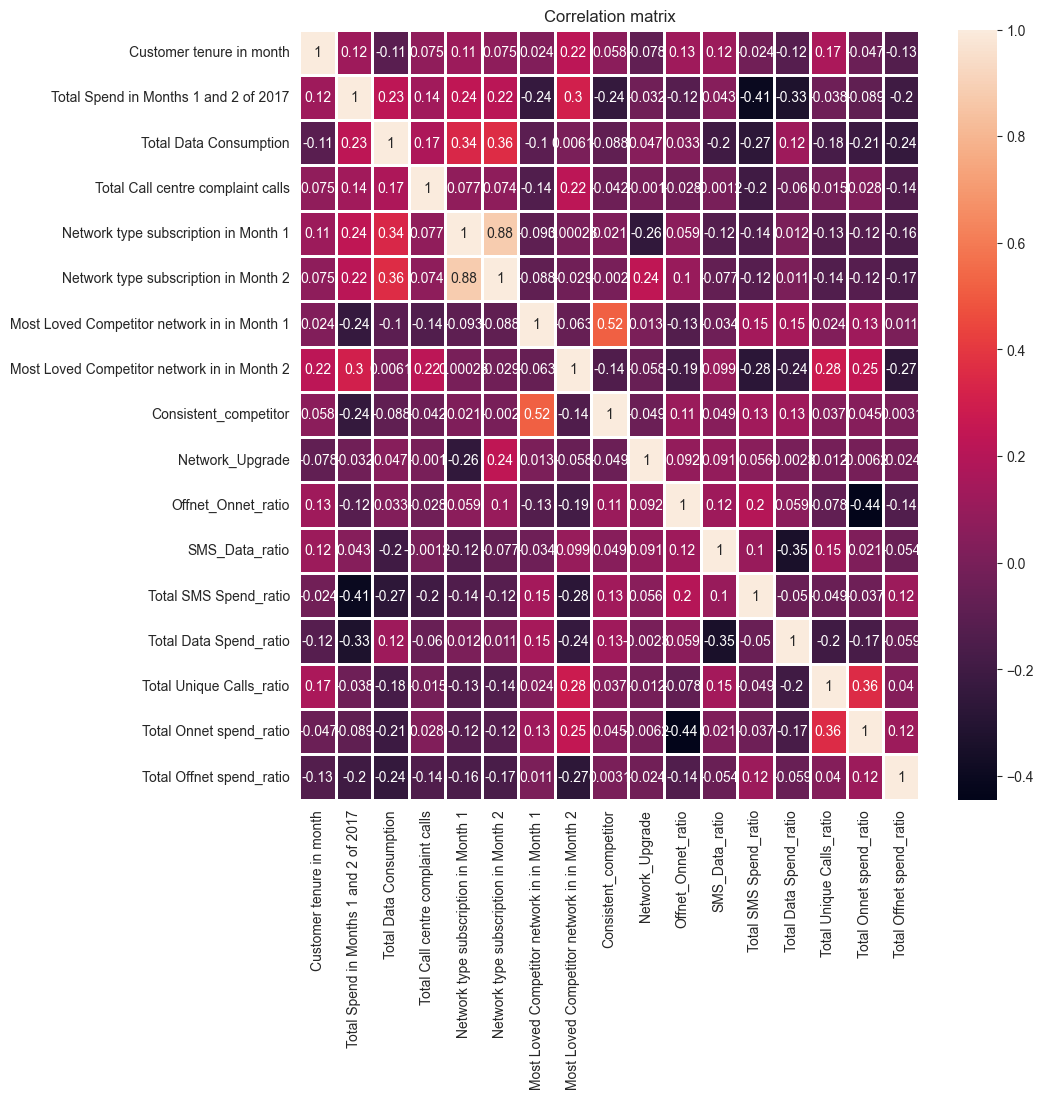

In [47]:

corr_matrix = X_test_transform.corr()
f, ax = plt.subplots(figsize=[10,10])
sns.heatmap(corr_matrix, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import (
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    balanced_accuracy_score,
    f1_score,
    roc_auc_score
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Définition des modèles de base avec leurs hyperparamètres
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_split=5, n_estimators=500, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, max_depth=10, n_estimators=500, learning_rate=0.001),
    "SVM": make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
    "MLP": make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state=42)),
    "Perceptron": make_pipeline(StandardScaler(), Perceptron(max_iter=300, random_state=42)),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Modèles pour Stacking et Voting
estimators = [
    ('rf', base_models["Random Forest"]),
    ('xgb', base_models["XGBoost"]),
    ('lgbm', base_models["LightGBM"]),
    ('logreg', base_models["Logistic Regression"])
]

base_models["Stacking"] = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=10
)
base_models["Voting"] = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# Dictionnaire pour stocker les résultats
performance_data = []

# Boucle d'entraînement, prédiction et évaluation
for name, model in base_models.items():
    model.fit(X_train_transform, y_train)
    y_pred = model.predict(X_test_transform)
    y_proba = model.predict_proba(X_test_transform)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Calcul des métriques
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Récupération des hyperparamètres utiles
    if hasattr(model, 'get_params'):
        params = model.get_params()
        useful_keys = ['n_estimators', 'max_depth', 'min_samples_split', 'learning_rate',
                       'C', 'n_neighbors', 'hidden_layer_sizes']
        filtered_params = {k: v for k, v in params.items() if k in useful_keys}
    else:
        filtered_params = {}

    # Ajout au tableau des résultats
    performance_data.append({
        "Model": name,
        "Balanced Accuracy": balanced_acc,
        "F1-Score": f1,
        "AUC-ROC": auc_roc,
        "Best Params": filtered_params
    })

# Création du DataFrame final
performance_df = pd.DataFrame(performance_data)
performance_df.set_index("Model", inplace=True)

# Affichage du tableau de performances sans la colonne Best Params
print(tabulate(performance_df.drop(columns=["Best Params"]), headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# Affichage des paramètres optimaux pour chaque modèle
print("\n🔧 Paramètres optimaux des modèles :\n")
for model_name, params in performance_df["Best Params"].items():
    print(f"🔹 {model_name} : {params}")

# Meilleur modèle selon l'AUC-ROC
best_model = performance_df["AUC-ROC"].idxmax()
print(f"\n🏆 Le meilleur modèle est **{best_model}** avec un AUC-ROC de **{performance_df.loc[best_model, 'AUC-ROC']:.4f}**")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 569, number of negative: 548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2581
[LightGBM] [Info] Number of data points in the train set: 1117, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\Larry\Desktop\HackStat_BI\Nouveau dossier\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 569, number of negative: 548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2581
[LightGBM] [Info] Number of data points in the train set: 1117, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 512, number of negative: 493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2580
[LightGBM] [Info] Number of data points in the train set: 1005, number of used features:

In [49]:
performance_df

,Balanced Accuracy,F1-Score,AUC-ROC,Best Params
Model,,,,
Logistic Regression,0.743421,0.727273,0.790399,{'C': 1.0}
Random Forest,0.837788,0.823529,0.904143,"{'max_depth': 20, 'min_samples_split': 5, 'n_e..."
XGBoost,0.836349,0.824427,0.918945,"{'learning_rate': 0.001, 'max_depth': 10, 'n_e..."
SVM,0.670436,0.669014,0.770045,{}
KNN,0.703742,0.674603,0.745554,{}
Naive Bayes,0.708882,0.648649,0.765882,{}
LightGBM,0.818873,0.801587,0.909745,"{'learning_rate': 0.1, 'max_depth': -1, 'n_est..."
MLP,0.656250,0.644689,0.683131,{}
Perceptron,0.628906,0.609023,0.628906,{}


In [369]:
performance_df['Best Params']['XGBoost']

{'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500}

In [354]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [3, 5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced'],
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 500, 1000],
        'max_depth': [10, 12, 15, 20],
        'learning_rate': [0.001, 0.01, 0.05],
        'subsample': [0.8, 1]
    })
    # "SVM": (SVC(probability=True), {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    #     'gamma': ['scale', 'auto']
    # }),
    # "KNN": (KNeighborsClassifier(), {
    #     'n_neighbors': [3, 5, 7],
    #     'weights': ['uniform', 'distance']
    # }),
    # "NaiveBayes": (GaussianNB(), {
    #     'var_smoothing': [1e-9, 1e-10, 1e-11]
    # })
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_transform, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation du modèle optimisé
    y_pred = best_model.predict(X_test_transform)
    y_proba = best_model.predict_proba(X_test_transform)[:, 1]
    
    accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


🔍 Optimisation de RandomForest en cours...
✅ RandomForest optimisé !
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}

🔍 Optimisation de XGBoost en cours...
✅ XGBoost optimisé !
Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}

+----+--------------+---------------------------------------------------------------------------------------------+------------+------------+-----------+
|    | Modèle       | Meilleurs Paramètres                                                                        |   Accuracy |   F1-Score |   AUC-ROC |
+====+==============+=============================================================================================+============+============+===========+
|  0 | RandomForest | {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200} |     0.822  |     0.8092 |    0.9051 |
+----+--------------+---------------

In [355]:
results_df

,Modèle,Meilleurs Paramètres,Accuracy,F1-Score,AUC-ROC
0,RandomForest,"{'class_weight': 'balanced', 'max_depth': 20, ...",0.8220,0.8092,0.9051
1,XGBoost,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.8337,0.8226,0.9150


### Random Forest

In [299]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tabulate import tabulate

# Définition du modèle et de la grille d’hyperparamètres pour Random Forest
rf_model = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [200, 250, 300, 400, 500, 1000],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'class_weight': ['balanced']
}

# Optimisation avec GridSearchCV
print("🔍 Optimisation de Random Forest en cours...")
grid_search_rf = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_transform, y_train)

# Meilleur modèle et paramètres
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Prédiction et évaluation
y_pred_rf = best_rf.predict(X_test_transform)
y_proba_rf = best_rf.predict_proba(X_test_transform)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Stockage des résultats
results_rf = {
    "Modèle": "Random Forest",
    "Meilleurs Paramètres": best_rf_params,
    "Accuracy": round(accuracy_rf, 4),
    "F1-Score": round(f1_rf, 4),
    "AUC-ROC": round(auc_rf, 4)
}

# Affichage des résultats
print(f"✅ Optimisation terminée !\nMeilleurs paramètres : {best_rf_params}\n")
print(tabulate([results_rf.values()], headers=results_rf.keys(), tablefmt="grid"))

🔍 Optimisation de Random Forest en cours...
✅ Optimisation terminée !
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': 40, 'min_samples_split': 20, 'n_estimators': 200}

+---------------+---------------------------------------------------------------------------------------------+------------+------------+-----------+
| Modèle        | Meilleurs Paramètres                                                                        |   Accuracy |   F1-Score |   AUC-ROC |
+===============+=============================================================================================+============+============+===========+
| Random Forest | {'class_weight': 'balanced', 'max_depth': 40, 'min_samples_split': 20, 'n_estimators': 200} |      0.775 |      0.782 |     0.878 |
+---------------+---------------------------------------------------------------------------------------------+------------+------------+-----------+


In [300]:
results_rf

{'Modèle': 'Random Forest',
 'Meilleurs Paramètres': {'class_weight': 'balanced',
  'max_depth': 40,
  'min_samples_split': 20,
  'n_estimators': 200},
 'Accuracy': 0.775,
 'F1-Score': 0.782,
 'AUC-ROC': 0.878}

## XGBoost

In [353]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Définition des modèles et de leurs grilles d’hyperparamètres
models = {
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [200, 250, 300, 400, 500, 800],
        'max_depth': [7, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.05],
        'subsample': [0.8, 1]
    })
}

# Dictionnaire pour stocker les résultats
results = []

# Boucle sur chaque modèle
for name, (model, param_grid) in models.items():
    print(f"🔍 Optimisation de {name} en cours...")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_transform, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Prédiction et évaluation
    y_pred_rf = best_rf.predict(X_test_transform)
    y_proba_rf = best_rf.predict_proba(X_test_transform)[:, 1]
    
    
    accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Stockage des résultats
    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# Affichage des résultats formatés
from tabulate import tabulate
print(tabulate(results_df, headers="keys", tablefmt="grid"))


🔍 Optimisation de XGBoost en cours...


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Optimisation globale

In [319]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tabulate import tabulate

# Grilles d'hyperparamètres
grids = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [200, 500],
        'max_depth': [10, 20],
        'min_samples_split': [5, 10],
        'class_weight': ['balanced']
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [200, 500],
        'max_depth': [10, 20],
        'learning_rate': [0.001, 0.01, 0.05],
        'subsample': [0.8, 1]
    }),
    "LightGBM": (LGBMClassifier(class_weight='balanced'), {
        'n_estimators': [200, 500],
        'max_depth': [10, 20],
        'learning_rate': [0.001, 0.01, 0.05],
        'subsample': [0.8, 1]
    })
}

# Résultats
results = []
best_params_dict = {}

# Optimisation GridSearch
for name, (model, param_grid) in grids.items():
    print(f"🔍 Optimisation de {name} en cours...")

    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_transform, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_params_dict[name] = best_params

    y_pred = best_model.predict(X_test_transform)
    y_proba = best_model.predict_proba(X_test_transform)[:, 1]

    results.append({
        "Modèle": name,
        "Meilleurs Paramètres": best_params,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "AUC-ROC": round(roc_auc_score(y_test, y_proba), 4)
    })

    print(f"✅ {name} optimisé !\nMeilleurs paramètres : {best_params}\n")

# Création du DataFrame des résultats
results_df = pd.DataFrame(results)

# ================= STACKING =================
print("\n⚙️ Entraînement du StackingClassifier...")

best_rf = RandomForestClassifier(**best_params_dict["RandomForest"], random_state=42)
best_xgb = XGBClassifier(**best_params_dict["XGBoost"], use_label_encoder=False, eval_metric='logloss', random_state=42)
best_lgb = LGBMClassifier(**best_params_dict["LightGBM"], class_weight='balanced', random_state=42)

stack = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgb', best_lgb)
    ],
    final_estimator=LogisticRegression(max_iter=500),
    cv=5
)

stack.fit(X_train_transform, y_train)
y_pred_stack = stack.predict(X_test_transform)
y_proba_stack = stack.predict_proba(X_test_transform)[:, 1]

results_df = pd.concat([results_df, pd.DataFrame([{
    "Modèle": "StackingClassifier",
    "Meilleurs Paramètres": "Stacking of RF, XGB, LGB",
    "Accuracy": round(accuracy_score(y_test, y_pred_stack), 4),
    "F1-Score": round(f1_score(y_test, y_pred_stack), 4),
    "AUC-ROC": round(roc_auc_score(y_test, y_proba_stack), 4)
}])], ignore_index=True)

print("✅ StackingClassifier entraîné !")

# ================= VOTING =================
print("\n⚙️ Entraînement du VotingClassifier...")

voting = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgb', best_lgb)
    ],
    voting='soft'
)

voting.fit(X_train_transform, y_train)
y_pred_vote = voting.predict(X_test_transform)
y_proba_vote = voting.predict_proba(X_test_transform)[:, 1]

results_df = pd.concat([results_df, pd.DataFrame([{
    "Modèle": "VotingClassifier",
    "Meilleurs Paramètres": "Voting (soft) of RF, XGB, LGB",
    "Accuracy": round(accuracy_score(y_test, y_pred_vote), 4),
    "F1-Score": round(f1_score(y_test, y_pred_vote), 4),
    "AUC-ROC": round(roc_auc_score(y_test, y_proba_vote), 4)
}])], ignore_index=True)

print("✅ VotingClassifier entraîné !")

# ================= Affichage =================
print("\n📊 Résumé des performances :\n")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid"))


🔍 Optimisation de RandomForest en cours...
✅ RandomForest optimisé !
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

🔍 Optimisation de XGBoost en cours...
✅ XGBoost optimisé !
Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

🔍 Optimisation de LightGBM en cours...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 557, number of negative: 560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2395
[LightGBM] [Info] Number of data points in the train set: 1117, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with po

In [320]:
results_df

,Modèle,Meilleurs Paramètres,Accuracy,F1-Score,AUC-ROC
0,RandomForest,"{'class_weight': 'balanced', 'max_depth': 10, ...",0.7571,0.7622,0.8697
1,XGBoost,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.7607,0.7666,0.8583
2,LightGBM,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.7643,0.7770,0.8636
3,StackingClassifier,"Stacking of RF, XGB, LGB",0.7643,0.7740,0.8734
4,VotingClassifier,"Voting (soft) of RF, XGB, LGB",0.7571,0.7671,0.8720


## Creation du fichier pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ------------------------------
# Variables catégorielles
# ------------------------------
cat_features = [
    'Network type subscription in Month 1', 
    'Network type subscription in Month 2', 
    'Most Loved Competitor network in in Month 1', 
    'Most Loved Competitor network in in Month 2'
]


class ImputeByIQR(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """
        Cette méthode calcule les bornes IQR pour chaque variable quantitative.
        """
        # Sélection des colonnes quantitatives
        self.quant_columns = X.select_dtypes(include=[np.number]).columns
        
        # Calcul des bornes IQR pour chaque variable quantitative
        self.lower_bounds = {}
        self.upper_bounds = {}
        
        for col in self.quant_columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[col] = Q1 - 1.5 * IQR
            self.upper_bounds[col] = Q3 + 1.5 * IQR
        
        return self

    def transform(self, X):
        """
        Cette méthode remplace les valeurs manquantes par la médiane dans les bornes IQR.
        """
        X = X.copy()
        
        # Imputation des valeurs manquantes par la médiane des données dans les bornes IQR
        for col in self.quant_columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = self.lower_bounds[col]
            upper_bound = self.upper_bounds[col]
            
            # Remplacer les valeurs manquantes (NaN) par la médiane des données dans les bornes IQR
            median_value = X[col].median()
            
            # Remplacer les NaN par la médiane pour chaque variable
            X[col] = X[col].fillna(median_value)
            
            # Traiter les valeurs qui sont en dehors des bornes IQR (si elles sont aberrantes)
            X[col] = np.clip(X[col], lower_bound, upper_bound)
        
        return X

# ------------------------------
# Étape 1 : Traitement des variables catégorielles
# ------------------------------
class CustomCategoricalImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_1 = X[cat_features[0]].mode()[0]
        self.most_frequent_2 = X[cat_features[1]].mode()[0]
        self.most_frequent_comp_1 = X[cat_features[2]].mode()[0]
        self.most_frequent_comp_2 = X[cat_features[3]].mode()[0]
        return self

    def transform(self, X):
        X = X.copy()
        for col in cat_features[2:]:
            X[col].replace('0', 'Aucun', inplace=True)
            X[col].fillna('Aucun', inplace=True)

        mask1 = X[cat_features[0]].isna() & X[cat_features[1]].notna()
        mask2 = X[cat_features[1]].isna() & X[cat_features[0]].notna()
        X.loc[mask1, cat_features[0]] = X.loc[mask1, cat_features[1]]
        X.loc[mask2, cat_features[1]] = X.loc[mask2, cat_features[0]]

        X[cat_features[0]].fillna(self.most_frequent_1, inplace=True)
        X[cat_features[1]].fillna(self.most_frequent_2, inplace=True)
        X[cat_features[2]].fillna(self.most_frequent_comp_1, inplace=True)
        X[cat_features[3]].fillna(self.most_frequent_comp_2, inplace=True)
        return X

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.freq_maps = {col: X[col].value_counts(normalize=True).to_dict() for col in cat_features}
        return self

    def transform(self, X):
        X = X.copy()
        for col in cat_features:
            X[col] = X[col].map(self.freq_maps[col])
        return X

# ------------------------------
# Étape 2 : Traitement des variables quantitatives
# ------------------------------
class CleanColumnNames(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.columns = X.columns.str.replace(" ", " ")
        return X




class CreateAdditionalFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # 1. Consistent competitor
        X['Consistent_competitor'] = (
            X['Most Loved Competitor network in in Month 1'].astype(str) == 
            X['Most Loved Competitor network in in Month 2'].astype(str)
        ).astype(int)

        # 2. Network Upgrade
        def upgrade_status(row):
            m1, m2 = row['Network type subscription in Month 1'], row['Network type subscription in Month 2']
            if m1 == '2G' and m2 == '3G':
                return 1
            elif m1 == '3G' and m2 == '2G':
                return -1
            else:
                return 0
        X['Network_Upgrade'] = X.apply(upgrade_status, axis=1)

        # 3. Offnet/Onnet ratio
        if 'Total Offnet spend' in X.columns and 'Total Onnet spend' in X.columns:
            ratio_offnet = X['Total Offnet spend'] / X['Total Onnet spend'].replace(0, np.nan)
            max_offnet = ratio_offnet[ratio_offnet.notna()].max()
            X['Offnet_Onnet_ratio'] = ratio_offnet.fillna(max_offnet)

        # 4. SMS/Data ratio
        if 'Total SMS Spend' in X.columns and 'Total Data Spend' in X.columns:
            ratio_sms_data = X['Total SMS Spend'] / X['Total Data Spend'].replace(0, np.nan)
            max_sms_data = ratio_sms_data[ratio_sms_data.notna()].max()
            X['SMS_Data_ratio'] = ratio_sms_data.fillna(max_sms_data)

        return X


class CreateRatios(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        base = "Total Spend in Months 1 and 2 of 2017"
        variables = [
            "Total SMS Spend", 
            "Total Data Spend", 
            "Total Unique Calls", 
            "Total Onnet spend", 
            "Total Offnet spend"
        ]
        variables_suppr = ['network_age', 'Customer ID']
        for var in variables:
            if var in X.columns:
                X[f"{var}_ratio"] = X[var] / X[base].replace(0, np.nan)
        X.drop(columns=variables + variables_suppr, inplace=True, errors='ignore')
        return X

class ScaleQuantVars(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.columns = X.select_dtypes(include=[np.number]).columns
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.columns] = self.scaler.transform(X[self.columns])
        return X
    
class ColumnSorter(BaseEstimator, TransformerMixin):
    def __init__(self, columns_order=None):
        self.columns_order = columns_order

    def fit(self, X, y=None):
        self.columns_order = X.columns.tolist()
        return self

    def transform(self, X):
        return X[self.columns_order]




# ------------------------------
# Étape 3 : Pipeline global
# ------------------------------
class FullPreprocessingPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cat_pipeline = Pipeline([
            ('imputer', CustomCategoricalImputer()),
            ('freq_encoder', FrequencyEncoder()),
            ("sort_columns", ColumnSorter())
        ])
        self.quant_pipeline = Pipeline([
            ('imputer', ImputeByIQR()),
            ("clean_columns", CleanColumnNames()),
            ("add_features", CreateAdditionalFeatures()),
            ("create_ratios", CreateRatios()),
            ("scale_vars", ScaleQuantVars())
        ])

    def fit(self, X, y=None):
        X_clean = self.quant_pipeline.fit_transform(X.copy())
        self.cat_pipeline.fit(X_clean[cat_features])
        return self

    def transform(self, X):
        X = self.quant_pipeline.transform(X.copy())
        X_cat = self.cat_pipeline.transform(X[cat_features])
        X[cat_features] = X_cat.astype(float)
        return X

# ------------------------------
# Utilisation
# ------------------------------
pipeline = FullPreprocessingPipeline()
# df_final = pipeline.fit_transform(df1)


In [76]:
pipeline.fit(X_train)

FullPreprocessingPipeline()

In [77]:
import joblib

# Sauvegarde dans un fichier .pkl
joblib.dump(pipeline, 'preprocessor.joblib')

['preprocessor.joblib']

### Cretion du fichier pkl

In [36]:
from xgboost import XGBClassifier
from joblib import dump  # pour sauvegarder le modèle

# # Suppose que X_train et y_train sont tes données d'entraînement déjà prêtes (après preprocessing)
# best_params = {
#     'class_weight': 'balanced',
#     'max_depth': None,
#     'min_samples_split': 10,
#     'n_estimators': 200
# }

best_model = XGBClassifier(eval_metric="logloss", random_state=42, max_depth=10, n_estimators=500, learning_rate=0.001)
best_model.fit(X_train_transform, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
# Sauvegarder le modèle dans un fichier .pkl
dump(best_model, 'churn_model.pkl')

['churn_model.pkl']

# Clustering

In [376]:
df = nig_cleaned

## First try

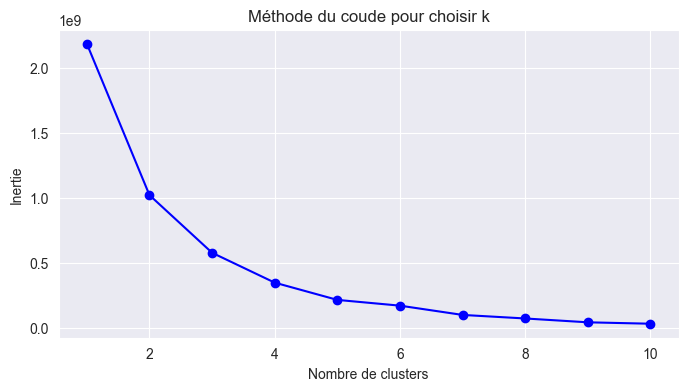

          count          mean          std      min         25%        50%  \
cluster                                                                      
0        1330.0    602.516125   478.451191     4.91    148.6186    545.756   
1           5.0  14200.630240  6345.889580  9969.21  10042.3532  10165.442   
2          62.0   4059.069677  1364.798977  2332.63   3125.7282   3718.824   

               75%        max  
cluster                        
0          963.030   2287.420  
1        16387.316  24438.830  
2         4602.720   7596.712  


C:\Users\Larry\AppData\Local\Temp\ipykernel_14756\2119998005.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='Total Spend in Months 1 and 2 of 2017', palette='Set2')


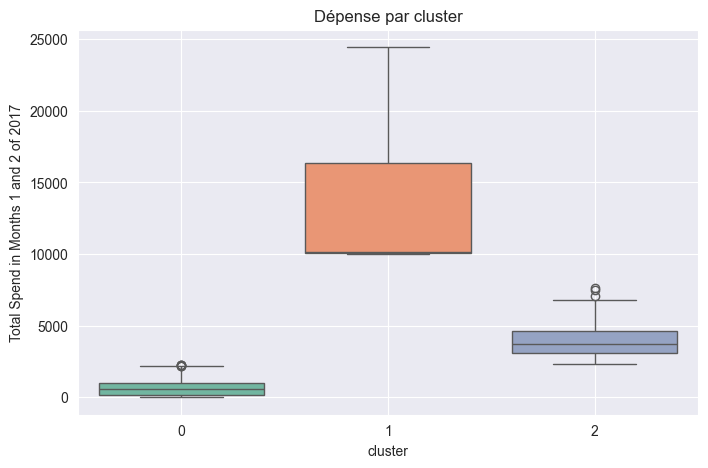

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Chargement des données
# Remplace ceci par le chemin réel de ton fichier
# df = pd.read_csv("chemin/vers/ton_fichier.csv")

# Si tu es déjà dans un notebook avec df existant, tu peux commenter la ligne ci-dessus

# 2. Sélection de la variable de dépense uniquement
X = df[['Total Spend in Months 1 and 2 of 2017']]

# 3. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X

# 4. Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()

# 5. Clustering avec le k choisi (ex. ici k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 6. Analyse des clusters
print(df.groupby('cluster')['Total Spend in Months 1 and 2 of 2017'].describe())

# 7. Visualisation des clusters
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='cluster', y='Total Spend in Months 1 and 2 of 2017', palette='Set2')
plt.title('Dépense par cluster')
plt.grid(True)
plt.show()


In [379]:
df

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,cluster
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,ADF1956,136,4.53,270.3344,6.58,2.50,7410.7529,62,9504,10820,1,3G,3G,PQza,Zintel,0,0
1396,ADF1965,1795,59.83,1024.8460,111.99,10.00,493671.9863,149,18202,40730,2,3G,3G,Mango,Zintel,0,0
1397,ADF1967,203,6.77,1143.4972,19.84,13.75,261.9307,284,360,81341,3,3G,3G,Zintel,Zintel,0,0
1398,ADF1971,109,3.63,45.0900,0.00,0.00,658162.2734,20,240,3611,1,3G,3G,Uxaa,Zintel,1,0


In [380]:
df.groupby('cluster')['Total Spend in Months 1 and 2 of 2017'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1330.0,602.516125,478.451191,4.91,148.6186,545.756,963.030,2287.420
1,5.0,14200.630240,6345.889580,9969.21,10042.3532,10165.442,16387.316,24438.830
2,62.0,4059.069677,1364.798977,2332.63,3125.7282,3718.824,4602.720,7596.712


## Second try

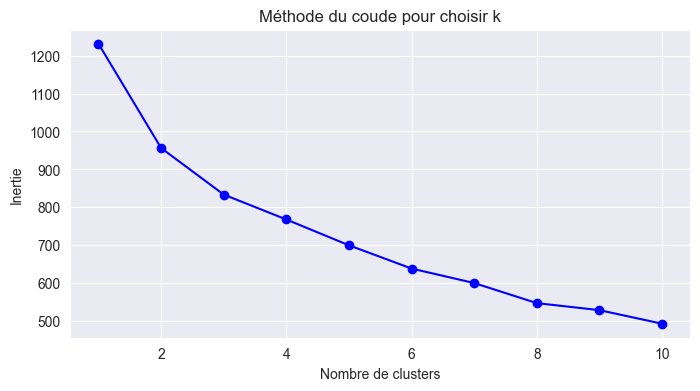

         count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0        152.0  0.454405  0.278635  0.004007  0.250935  0.410335  0.539038   
1        299.0  0.222036  0.226280  0.002432  0.045982  0.124624  0.365591   
2        224.0  0.248309  0.273751  0.000000  0.026490  0.089295  0.395071   
3        442.0  0.312214  0.240426  0.007426  0.088985  0.289701  0.443021   

         max  
cluster       
0        1.0  
1        1.0  
2        1.0  
3        1.0  


C:\Users\Larry\AppData\Local\Temp\ipykernel_14756\428502015.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='Total Spend in Months 1 and 2 of 2017', palette='Set3')


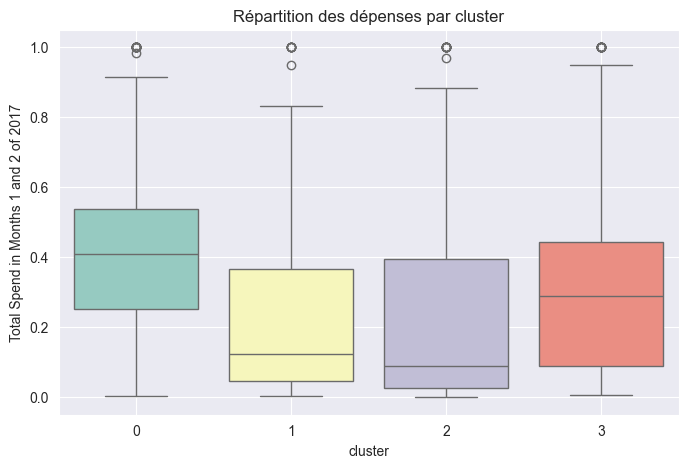

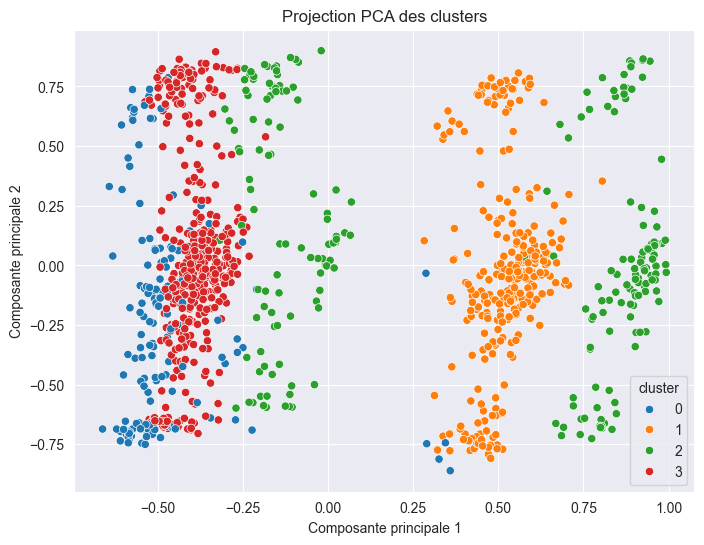

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Chargement des données
# Remplace ceci par le chemin réel de ton fichier
# df = pd.read_csv("chemin/vers/ton_fichier.csv")

# Si tu es déjà dans un notebook avec df existant, tu peux commenter la ligne ci-dessus

# 2. Séparation des variables
X = df.drop(columns=['Total Spend in Months 1 and 2 of 2017'])
y = df['Total Spend in Months 1 and 2 of 2017']

# # 3. Standardisation des données
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

X_scaled = X

# 4. Détermination du nombre optimal de clusters (méthode du coude)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()

# 5. Clustering avec le k choisi (ex. ici k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 6. Analyse par cluster de la variable de dépense
print(df.groupby('cluster')['Total Spend in Months 1 and 2 of 2017'].describe())

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='cluster', y='Total Spend in Months 1 and 2 of 2017', palette='Set3')
plt.title('Répartition des dépenses par cluster')
plt.grid(True)
plt.show()

# 7. Visualisation des clusters en 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='tab10')
plt.title('Projection PCA des clusters')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
plt.show()


# Autres

In [54]:
X = nig

In [55]:
def upgrade_status(row):
    m1, m2 = row['Network type subscription in Month 1'], row['Network type subscription in Month 2']
    if m1 == '2G' and m2 == '3G':
        return "Forward"
    elif m1 == '3G' and m2 == '2G':
        return "Backward"
    else:
        return "No change"

X['Network_Upgrade'] = X.apply(upgrade_status, axis=1)

In [58]:
X['Network_Upgrade'].value_counts(dropna=True).sort_index()

Backward       34
Forward        55
No change    1311
Name: Network_Upgrade, dtype: int64

In [59]:
X_train

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
155,ADF1259,3805,126.83,681.9360,81.47,3.75,3.624375e+03,117,39261,3657,2,2G,2G,Uxaa,Uxaa
887,ADF1879,5451,181.70,174.7700,28.87,0.00,7.215920e+01,23,0,8648,2,3G,3G,Mango,Weematel
1120,ADF1425,3817,127.23,1042.0400,10.50,76.25,3.268204e+05,393,16236,29519,1,Other,Other,PQza,Uxaa
339,ADF0121,634,21.13,1154.6904,9.56,325.00,1.132915e+06,48,992,17843,1,3G,3G,Weematel,Mango
1143,ADF1562,1391,46.37,34.0340,3.50,17.50,1.579329e+03,7,251,179,1,Other,Other,PQza,Uxaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,ADF1222,1445,48.17,601.2160,1.75,76.25,3.304395e+05,27,970,1936,1,Other,Other,PQza,Uxaa
1132,ADF1465,3298,109.93,1125.9100,166.88,13.75,3.951283e+04,255,24180,16174,2,Other,Other,Zintel,Uxaa
1297,ADF1051,117,3.90,136.1300,0.00,8.75,5.339776e+05,14,6192,358,2,2G,3G,Uxaa,Uxaa
861,ADF1818,2189,72.97,1841.6900,18.23,101.25,1.815257e+05,340,49351,43318,1,3G,3G,Uxaa,Uxaa


In [66]:
#X_test = X_test.drop(columns=['Customer ID'])
X_test = X_test.reset_index(drop=True)

In [67]:
X_test = X_test.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [74]:
X_test.to_csv('X_test.csv', index=False)  # Pour éviter d’écrire l’index auto

In [70]:
X_train

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
155,ADF1259,3805,126.83,681.9360,81.47,3.75,3.624375e+03,117,39261,3657,2,2G,2G,Uxaa,Uxaa
887,ADF1879,5451,181.70,174.7700,28.87,0.00,7.215920e+01,23,0,8648,2,3G,3G,Mango,Weematel
1120,ADF1425,3817,127.23,1042.0400,10.50,76.25,3.268204e+05,393,16236,29519,1,Other,Other,PQza,Uxaa
339,ADF0121,634,21.13,1154.6904,9.56,325.00,1.132915e+06,48,992,17843,1,3G,3G,Weematel,Mango
1143,ADF1562,1391,46.37,34.0340,3.50,17.50,1.579329e+03,7,251,179,1,Other,Other,PQza,Uxaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,ADF1222,1445,48.17,601.2160,1.75,76.25,3.304395e+05,27,970,1936,1,Other,Other,PQza,Uxaa
1132,ADF1465,3298,109.93,1125.9100,166.88,13.75,3.951283e+04,255,24180,16174,2,Other,Other,Zintel,Uxaa
1297,ADF1051,117,3.90,136.1300,0.00,8.75,5.339776e+05,14,6192,358,2,2G,3G,Uxaa,Uxaa
861,ADF1818,2189,72.97,1841.6900,18.23,101.25,1.815257e+05,340,49351,43318,1,3G,3G,Uxaa,Uxaa


In [71]:
X_train.to_csv('X_train.csv', index=False)  # Pour éviter d’écrire l’index auto